In [1]:
#%matplotlib notebook
%matplotlib inline
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(1234)
from astropy.io import fits
import astropy.units as u
import pandas as pd
from astropy.table import Table
from matplotlib import colors,cm

In [ ]:
# Loading BAT data of Vela X-1 and looking info
vela_file = 'data/bat_Vela_X-1_lc-8.fits'
fits.info(vela_file)

In [ ]:
# See HEADER file for further info
hdu = fits.open(vela_file)
hdu[1].header

In [ ]:
# LOAD data with PANDAS and look at the EVENT table
vela_ft = fits.open(vela_file)[1].data
vela = Table.read(vela_file).to_pandas()
vela

In [ ]:
# Some statistical vaues (# events, min, max, mean, std, ...)
vela.describe()

In [ ]:
# Plot LC
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set_title('Vela LC')
ax.set_xlabel('Time [MJD]')
ax.set_ylabel('Rate [A.U.]')
ax.set_xlim(vela['TIME'].min(),vela['TIME'].max())
ax.errorbar(vela['TIME'],vela['RATE'],xerr=0.5*vela['TIMEDEL']*vela['FRACEXP'],yerr=vela['ERROR'],label='Vela X-1',ls='')
#ax.errorbar(vela['TIME'][vela['FRACEXP']>1],vela['RATE'][vela['FRACEXP']>1],xerr=0.5*vela['TIMEDEL'][vela['FRACEXP']>1]*vela['FRACEXP'][vela['FRACEXP']>1],yerr=vela['ERROR'][vela['FRACEXP']>1],label='FRACEXP>1',ls='')

In [ ]:
# Plot RATE histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set_title('Vela X-1 histogram of RATE')
ax.set_xlabel('Vela[RATE]')
ax.hist(vela['RATE'], bins=500)#, range=[-0.01,0.05])
ax.axvline(0,ls=':',color='k')

In [ ]:
# Plot only events whose RATE is: 0 > RATE > 0.002
#vela[np.logical_and(vela['PHASE']>i/bin,vela['PHASE']<(i+1)/bin)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set_title('Vela X-1 MINIMUM fluxes')
ax.set_xlabel('Time [MJD]')
ax.set_ylabel('Rate [A.U.]')
ax.set_xlim(vela['TIME'].min(),vela['TIME'].max())
mask = np.logical_and(vela['RATE']>0,vela['RATE']<0.002)
ax.errorbar(vela['TIME'][mask],
            vela['RATE'][mask],
            xerr=0.5*vela['TIMEDEL'][mask]*vela['FRACEXP'][mask],
            yerr=vela['ERROR'][mask],
            label='Vela X-1',ls='')
ax.plot(vela['TIME'][mask],vela['RATE'][mask],ls='',marker='.',c='r')

In [ ]:
# Looking for the PERIODICITY
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select a small TIME range and FILTER OUT negative values
mask = np.logical_and(vela['RATE']>0,vela['TIME']<53600)
x = vela['TIME'][mask]
y = vela['RATE'][mask]

# Define the array of frequencies for which to compute the periodogram:
nout=100000
period = np.logspace(-1, 2, nout) # from 0.1 day to 100 days
ang_freqs = 2 * np.pi / period

# Calculate Lomb-Scargle periodogram:
# (weak periodic signal with unven sampling)
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

#Now make a plot of the input data:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')

#Then plot the normalized periodogram:
ax[1].plot(period, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')
for i,j in zip(period,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

In [ ]:
# Refine search with SMALLE LINEAR range PERIOD: 0-15 days
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Define the array of frequencies for which to compute the periodogram:
p = np.linspace(0.1, 15, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

In [ ]:
# Use a LARGER sample of data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select TIME range and FILTER OUT negative values
tmax = 53800
mask = np.logical_and(vela['RATE']>0,vela['TIME']<tmax)
x = vela['TIME'][mask]
y = vela['RATE'][mask]

# Define the array of frequencies for which to compute the periodogram:
nout=100000
p = np.linspace(0.1, 15, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

<IPython.core.display.Javascript object>


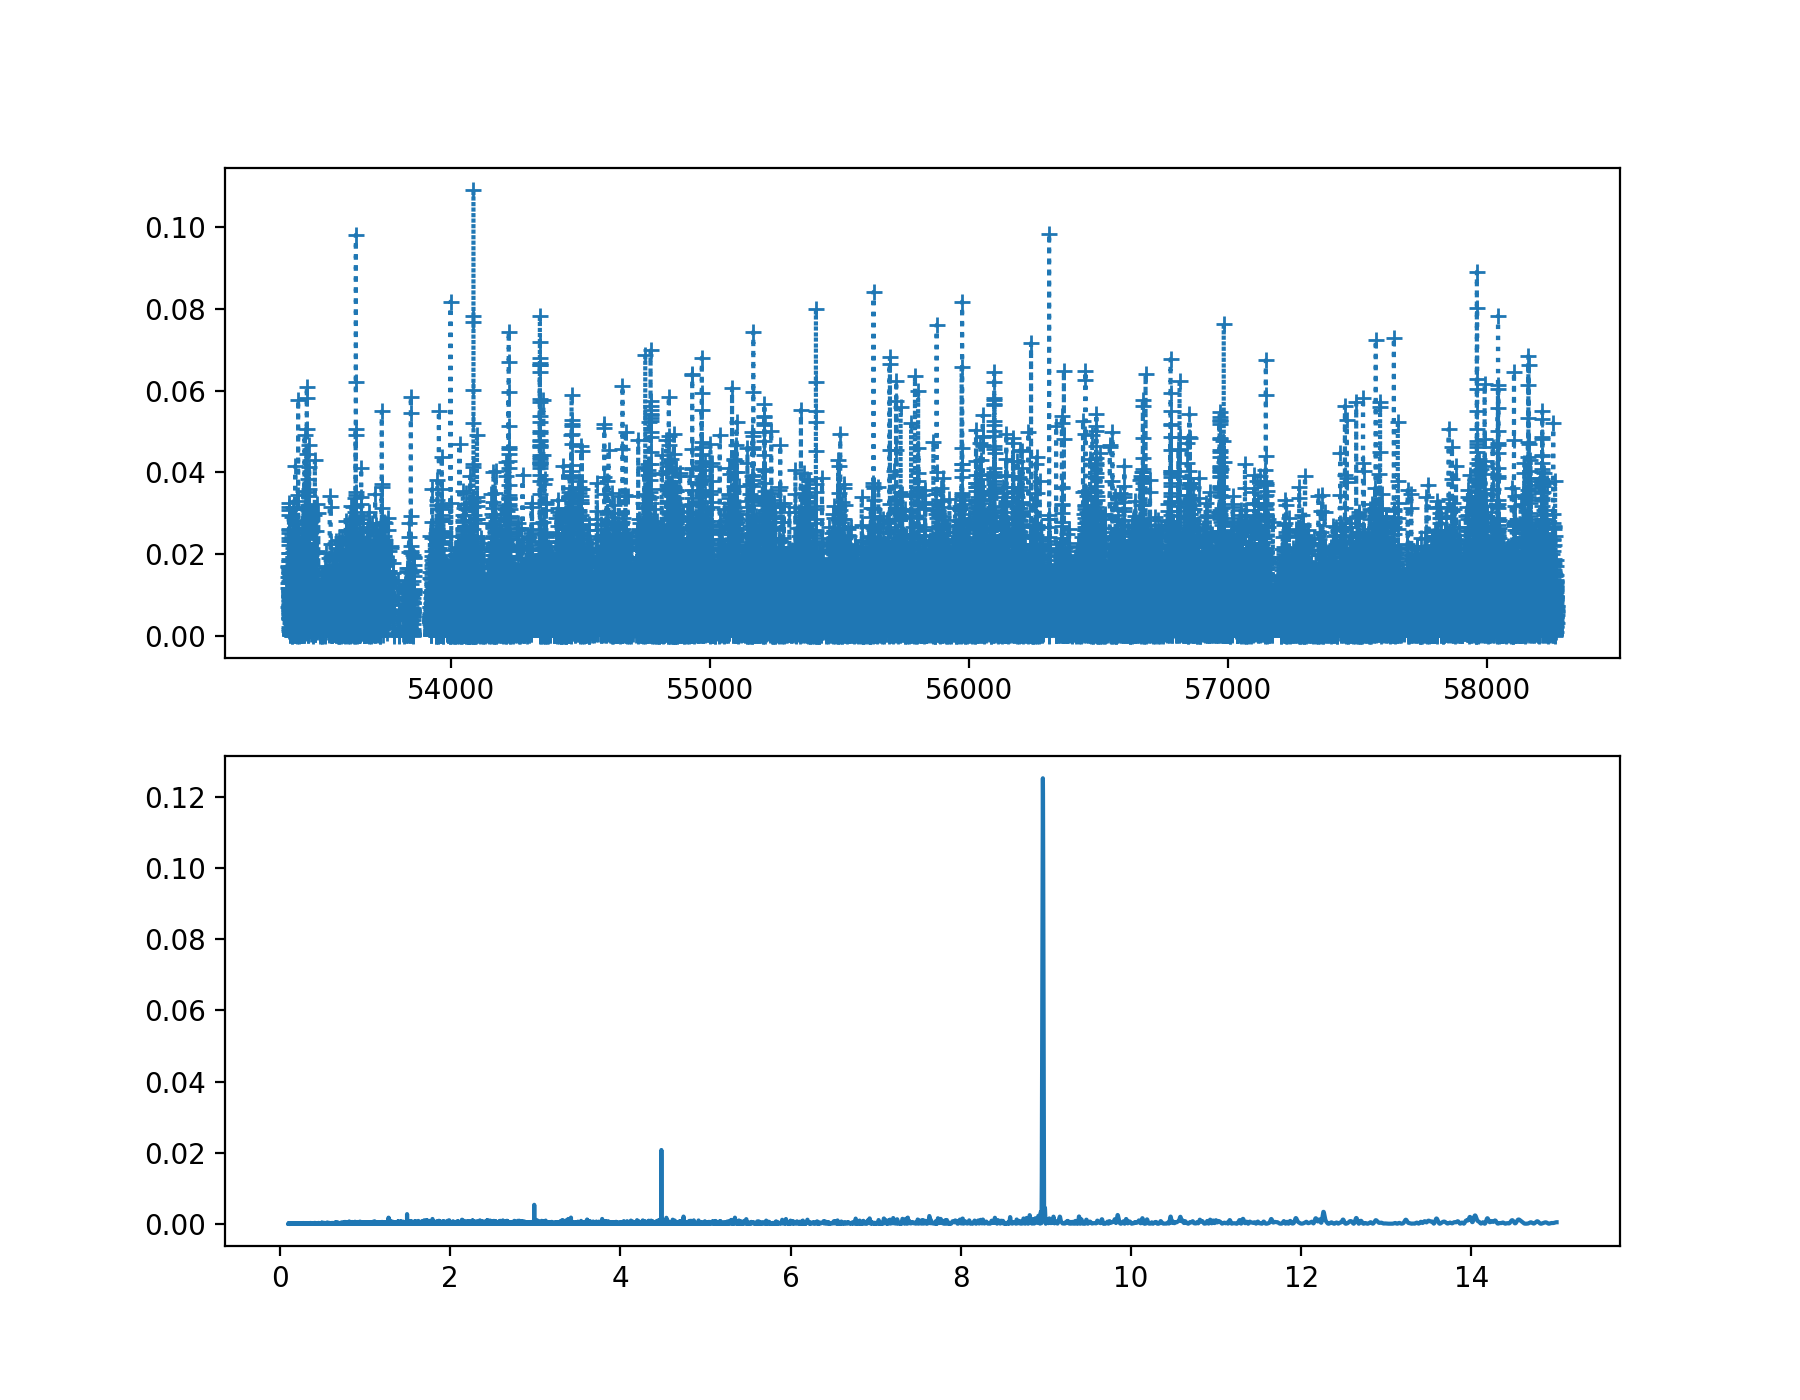

Best period = 8.96409864098641


In [225]:
# Use ALL available data: VERY SLOW
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select TIME range and FILTER OUT negative values
tmax = vela['TIME'].max()
mask = np.logical_and(vela['RATE']>0,vela['TIME']<tmax)
x = vela['TIME'][mask]
y = vela['RATE'][mask]

# Define the array of frequencies for which to compute the periodogram:
nout=100000
p = np.linspace(0.1, 15, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

In [ ]:
def binned_plot(bin,arr,ax):
    avg,avg_err,avg_err_mean=[],[],[]
    for i in range(bin):
        a = arr[np.logical_and(arr['PHASE']>i/bin,arr['PHASE']<(i+1)/bin)]
        avg.append(a.RATE.mean())
        avg_err.append(np.sqrt((a.ERROR*a.ERROR).sum())/len(a.ERROR))
        avg_err_mean.append(a.ERROR.mean())
    ax.errorbar(np.linspace(0,1,bin),avg,xerr=0.5/bin,yerr=avg_err,ls=':',label='%s bin' % bin)
    ax.axhline(0,ls='--')
    return

# Create FOLDED LC
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(9,25))
fig.suptitle('Vela X-1 FOLDED LC:')
for m,period in enumerate([8.93942351813576,
                           8.939215392153923,                           
                           8.967823678236783,
                           8.96558865588656,
                           8.96409864098641,
                           8.964357]):
    vela['PHASE'] = np.zeros(len(vela['TIME']))
    for n,t in enumerate(vela['TIME']):
        vela.at[n,'PHASE'] = (t % period)/period
    ax[m,0].set(title='ALL data, P=%.4f' % period, xlabel='Phase', ylabel='RATE [#/s]', ylim=(-0.01,0.05))
    ax[m,0].plot(vela['PHASE'],vela['RATE'],',')
    
    binned_plot(30,vela,ax[m,1])
    ax[m,1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='RATE [#/s]', ylim=(-0.0007,0.012))
    binned_plot(200,vela,ax[m,1])    
    ax[m,1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

<IPython.core.display.Javascript object>


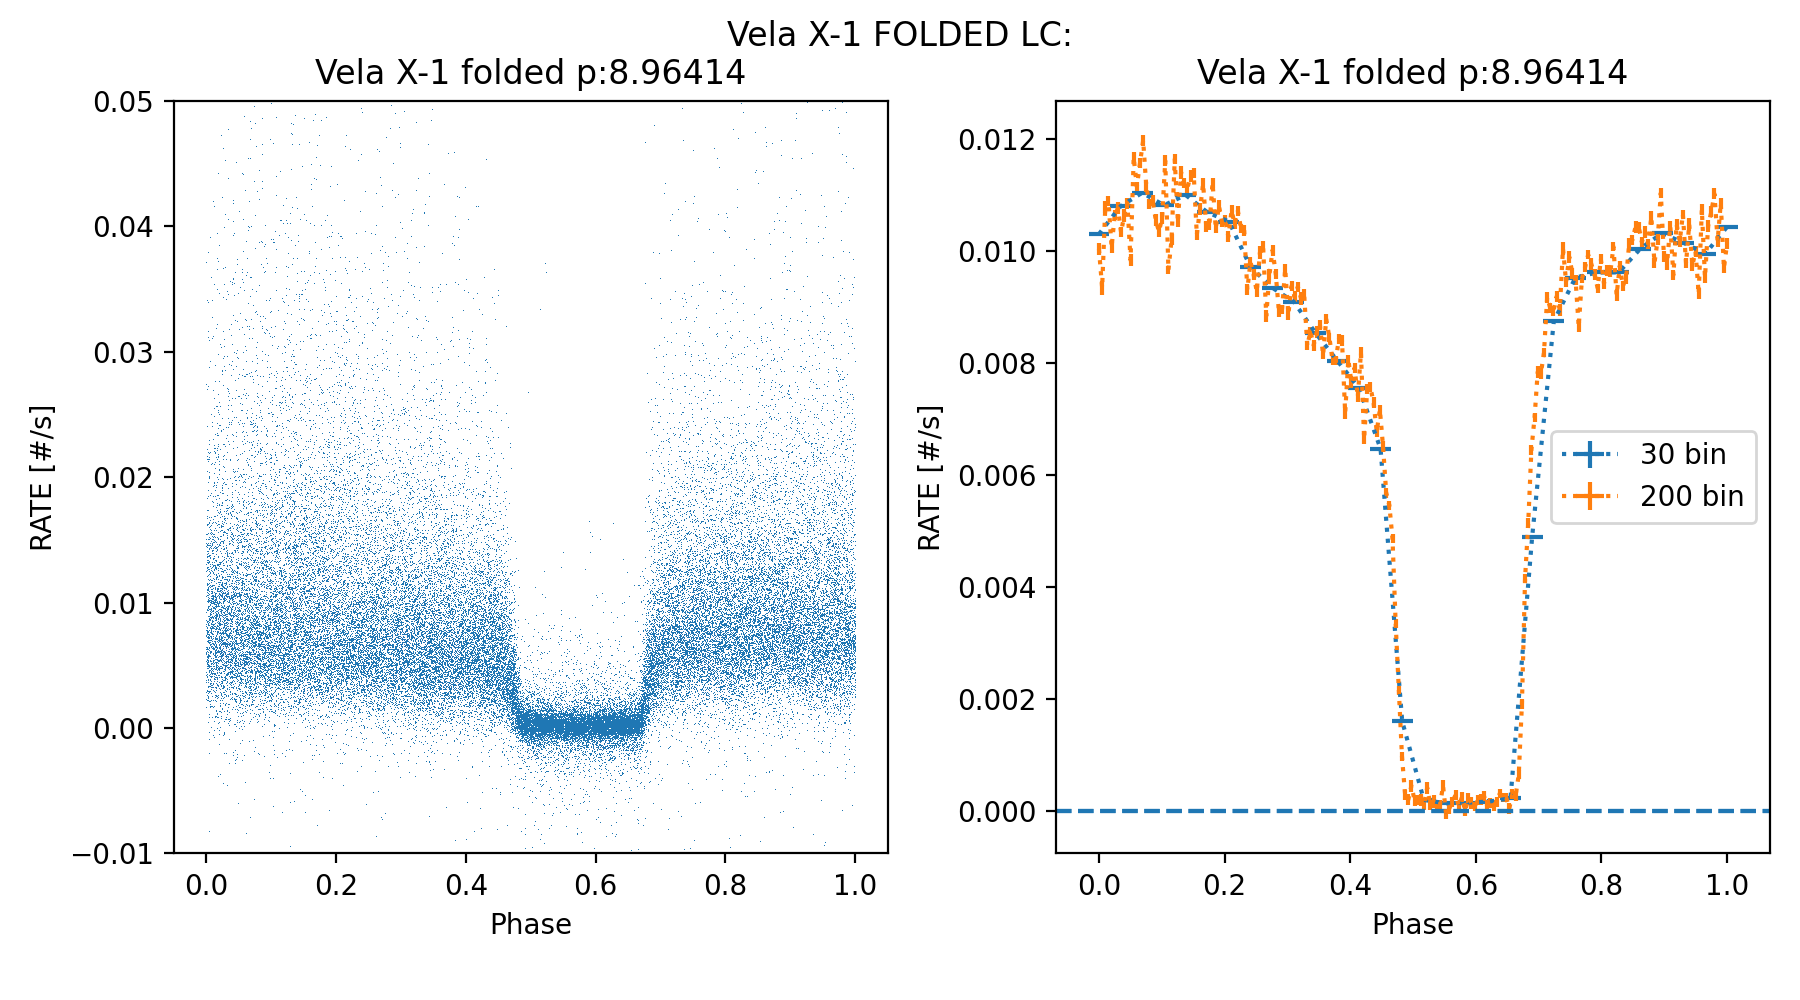

period bin_min best_period max_bin_min
p = 8.96	b = 14	bp = 8.96	bb = 14
p = 8.960101010101011	b = 15	bp = 8.960101010101011	bb = 15
p = 8.96020202020202	b = 16	bp = 8.96020202020202	bb = 16
p = 8.96030303030303	b = 17	bp = 8.96030303030303	bb = 17
p = 8.960404040404041	b = 18	bp = 8.960404040404041	bb = 18
p = 8.960505050505052	b = 17	bp = 8.960404040404041	bb = 18
p = 8.960606060606061	b = 19	bp = 8.960606060606061	bb = 19
p = 8.960707070707072	b = 20	bp = 8.960707070707072	bb = 20
p = 8.960808080808082	b = 20	bp = 8.960707070707072	bb = 20
p = 8.960909090909091	b = 21	bp = 8.960909090909091	bb = 21
p = 8.961010101010102	b = 21	bp = 8.960909090909091	bb = 21
p = 8.961111111111112	b = 21	bp = 8.960909090909091	bb = 21
p = 8.961212121212123	b = 23	bp = 8.961212121212123	bb = 23
p = 8.961313131313132	b = 24	bp = 8.961313131313132	bb = 24
p = 8.961414141414142	b = 25	bp = 8.961414141414142	bb = 25
p = 8.961515151515153	b = 25	bp = 8.961414141414142	bb = 25
p = 8.961616161616162	b = 26	bp

In [66]:
# Fine tune the periodicity, looking for the PERIOD which MAXIMIZE the ECLIPSE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.suptitle('Vela X-1 FOLDED LC:')
max_bin_min = 0
best_period = 0
print('period bin_min best_period max_bin_min')
for period in np.linspace(8.96,8.97,100):
    vela['PHASE'] = np.zeros(len(vela['TIME']))
    for n,t in enumerate(vela['TIME']):
        vela.at[n,'PHASE'] = (t % period)/period

    avg,avg_err,avg_err_mean=[],[],[]
    bin=200
    bin_min = 0
    for i in range(bin):
        a = vela[np.logical_and(vela['PHASE']>i/bin,vela['PHASE']<(i+1)/bin)]
        avg.append(a.RATE.mean())
        avg_err.append(np.sqrt((a.ERROR*a.ERROR).sum())/len(a.ERROR))
        avg_err_mean.append(a.ERROR.mean())
        if avg[-1] + avg_err[-1] < 0.002:
            bin_min += 1
    if bin_min > max_bin_min:
        max_bin_min = bin_min
        best_period = period
    print('p = %s\tb = %s\tbp = %s\tbb = %s' % (period,bin_min,best_period,max_bin_min))

# Redo the plot with the BEST PERIOD
vela['PHASE'] = np.zeros(len(vela['TIME']))
for n,t in enumerate(vela['TIME']):
    vela.at[n,'PHASE'] = (t % best_period)/best_period
ax[0].set(title='Vela X-1 folded p:%.5f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
ax[0].plot(vela['PHASE'],vela['RATE'],',')
ax[0].set_ylim(-0.01,0.05)

binned_plot(30,vela,ax[1])
ax[1].set(title='Vela X-1 folded p:%.5f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')

binned_plot(200,vela,ax[1])
ax[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [ ]:
# Fine tune the periodicity and look for the PERIOD which MAXIMIZE the ECLIPSE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Vela X-1 FOLDED LC:')

max_bin_min = 0
best_period = 0
bin=200
period_list = []
width_eclipse = []
print('period bin_min best_period max_bin_min')
for period in np.linspace(8.963,8.966,30):
    vela['PHASE'] = np.zeros(len(vela['TIME']))
    for n,t in enumerate(vela['TIME']):
        vela.at[n,'PHASE'] = (t % period)/period    
    avg,avg_err,avg_err_mean=[],[],[]
    bin_min = 0
    for i in range(bin):
        a = vela[np.logical_and(vela['PHASE']>i/bin,vela['PHASE']<(i+1)/bin)]
        avg.append(a.RATE.mean())
        avg_err.append(np.sqrt((a.ERROR*a.ERROR).sum())/len(a.ERROR))
        avg_err_mean.append(a.ERROR.mean())
        if avg[-1] + avg_err[-1] < 0.002:
            bin_min += 1
    width_eclipse.append(bin_min)
    period_list.append(period)
    if bin_min > max_bin_min:
        max_bin_min = bin_min
        best_period = period
    print('p = %s\tb = %s\tbp = %s\tbb = %s' % (period,bin_min,best_period,max_bin_min))

# Redo the plot with the BEST PERIOD
vela['PHASE'] = np.zeros(len(vela['TIME']))
for n,t in enumerate(vela['TIME']):
    vela.at[n,'PHASE'] = (t % best_period)/best_period

ax[0].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
ax[0].plot(vela['PHASE'],vela['RATE'],',')
ax[0].set_ylim(-0.01,0.05)

binned_plot(30,vela,ax[1])
ax[1].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
binned_plot(200,vela,ax[1])
ax[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set(title='Eclipse width as a function of period',xlabel='Period [days]',ylabel='Width eclipse [# bin/%s]'%bin)
ax.plot(period_list,width_eclipse,'o-',label='width eclipse')
z = np.polyfit(period_list, width_eclipse, 2)
p = np.poly1d(z)
xp = np.linspace(period_list[0], period_list[-1], 100)
ax.plot(xp, p(xp), '--', label='fit')
ax.axvline(xp[np.argmax(p(xp))],ls=':', label = 'max')
ax.set_title('Best period is P = %.4f' % xp[np.argmax(p(xp))])
ax.legend()

In [ ]:
# Folded light curve
period = 8.964357 #day

vela['PHASE'] = np.zeros(len(vela['TIME']))
for n,t in enumerate(vela['TIME']):
    vela.at[n,'PHASE'] = (t % period)/period

In [ ]:
vela

In [ ]:
# Remake the plot with the best know period
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Vela X-1 FOLDED LC:')

ax[0].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
ax[0].plot(vela['PHASE'],vela['RATE'],',')
ax[0].set_ylim(-0.01,0.05)

binned_plot(30,vela,ax[1])
ax[1].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
binned_plot(200,vela,ax[1])
ax[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [ ]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(9,7))
grid = plt.GridSpec(2, 10, hspace=0, wspace=0.)
bottom = fig.add_axes([0.1, 0.1, 0.8, 0.4])
bottom.plot(vela['PHASE'],vela['RATE'],',')
bottom.set(xlim=(0,1),ylim=(0,0.05),xlabel='Phase',ylabel='Rate')
bottom.tick_params(labelright=True)
for i in [0.3,0.35,0.5,0.55]:
    bottom.axvline(i,ls='--')

nbins=40
left = fig.add_axes([0.1, 0.5, 0.24, 0.4], xticklabels=[], sharey=bottom)
left.hist(vela['RATE'][vela['PHASE']<0.3],range=[0,0.05],bins=nbins,orientation='horizontal')
left.invert_xaxis()

right = fig.add_axes([0.54, 0.5, 0.36, 0.4], xticklabels=[], sharey=bottom)
right.hist(vela['RATE'][vela['PHASE']>0.6],range=[0,0.05],bins=nbins,orientation='horizontal')
right.invert_xaxis()
right.yaxis.tick_right()

center = fig.add_axes([0.38, 0.5, 0.12, 0.4], sharey=bottom)
center.hist(vela['RATE'][np.logical_and(vela['PHASE']>0.35,vela['PHASE']<0.5)],range=[0,0.05],bins=nbins,orientation='horizontal')
center.invert_xaxis()
center.tick_params(labelbottom=False, labelleft=False)

# Move now to analyse Fermi-LAT data (gamma-rays)

Download Fermi-LAT data of Geminga pulsar, from the START of the mission till MJD = 55196 from the website:

https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi

![title](pics/data_query.png)

In [200]:
# Loading SPACECRAFT file
sc = 'data/spacecraft.fits'
fits.info(sc)

Filename: data/spacecraft.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SC_DATA       1 BinTableHDU    265   1237128R x 30C   [D, D, 3E, E, E, D, E, E, E, E, E, E, L, E, E, E, E, E, E, E, J, B, I, D, D, D, D, D, E, E]   


In [201]:
# See HEADER file for further info
hdu = fits.open(sc)
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  152 / width of table in bytes                        
NAXIS2  =              1237128 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   30 / number of fields in each row                   
TTYPE1  = 'START   '           / STARTing time of interval (Mission Elapsed Time
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'STOP    '           / ending time of interval (Mission Elapsed Time) 
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'SC_POSITION'     

We need to run now "gtselect":
![title](pics/gtselect.png)

...and then "gtmktime":
![title](pics/gtmktime.png)

In [ ]:
# Load photon files
geminga_file = 'data/Geminga_gtis.fits'
fits.info(geminga_file)

In [ ]:
# LOAD data with PANDAS and look at the EVENT table
geminga_hdu = fits.open('data/Geminga_gtis.fits')
geminga_data = geminga_hdu[1].data
names = [name for name in geminga_data.columns.names if len(geminga_data[name].shape) <= 1]
geminga = Table.read('data/Geminga_gtis.fits',hdu=1)
geminga = geminga[names].to_pandas()
geminga

In [ ]:
# We can now plot a count map of the events
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='CMAP: Galactic',xlabel='L',ylabel='B')
h = ax.hist2d(geminga['L'],geminga['B'],100, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax.axis('equal')
fig.colorbar(h[3], ax=ax, orientation='vertical')

In [188]:
# Crop 1deg around Geminga (to shrink the file size and account for bad PSF)
ra  = 98.476204
dec = 17.770661
dist = np.sqrt( (geminga['RA']-ra)**2 + (geminga['DEC']-dec)**2) 
crop = geminga[dist<1]

In [ ]:
crop

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set(title='Light curve GEMINGA',xlabel='Time [s]',ylabel='Counts')
h = ax.hist(crop['TIME']-crop['TIME'].min(), 1000)
#h = ax.hist(crop['TIME']-crop['TIME'].min(),range=(0,3600), bins=10)

Because the LAT data are sparse, long accumulation time is required. Calculating a pulse phase therefore requires precise position and timing information for the pulsar.

In [ ]:
# Use ALL available data: VERY SLOW
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select TIME range and FILTER OUT negative values
x = crop['TIME'][:100]
y = np.ones(len(x))

# Define the array of frequencies for which to compute the periodogram:
nout=100000
p = np.linspace(0.01, 2, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y, ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [s]',ylabel='Rate [A.U.]',title='Geminga LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [s]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

In [7]:
# Attribute PHASE to cropped Geminga
period = 1/4.217567
crop_dummy = crop.copy()
crop_dummy['PHASE'] = np.zeros(len(crop_dummy['TIME']))
for n,t in zip(crop_dummy.index,crop_dummy['TIME']):
    crop_dummy.loc[n,'PHASE'] = (t % period)/period

In [ ]:
# Create FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga FOLDED LC:')
ax[0].set(title='ALL data, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
ax[0].plot(crop_dummy['TIME'],crop_dummy['PHASE'],',')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(crop_dummy['PHASE'],200)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [ ]:
# See HEADER file for further info
geminga_hdu[1].header

## Performing BARYCENTRIC correction with gtbary (or faxbary)

The telescope is moving around the Earth, which in turns move around the Sun. So we should refer to the arrival time at a point in the solar system which is at rest. Such a point is the system's centre of mass, the so-called solar system barycentre, which we assume to be comoving with the pulsar.  

If the assumed pulsar position is inaccurate, our transformation to the solar system barycentre will be wrong too, creating a deviation from the expected arrival time that depends on the position of the Earth in its orbit. Hence, the deviation will have a sinusoid shape with the period of one year.

![title](pics/bary.png)

![title](pics/bary_formula.png)

![title](pics/bary_formula_component.png)

In [200]:
# Load Geminga_bary files
roi_file = 'data/gtbary/Geminga_1deg_roi.fits'
roi = fits.open(roi_file)
roi_fits = fits.open(roi_file)[1].data
names = [name for name in roi_fits.columns.names if len(roi_fits[name].shape) <= 1]
roi = Table.read(roi_file,hdu=1)
roi = roi[names].to_pandas()

roi_geo_file = 'data/gtbary/Geminga_1deg_roi_geo.fits'
roi_geo = fits.open(roi_geo_file)
roi_geo_fits = fits.open(roi_geo_file)[1].data
names = [name for name in roi_geo_fits.columns.names if len(roi_geo_fits[name].shape) <= 1]
roi_geo = Table.read(roi_geo_file,hdu=1)
roi_geo = roi_geo[names].to_pandas()

roi_bary_file = 'data/gtbary/Geminga_1deg_roi_bary.fits'
roi_bary = fits.open(roi_bary_file)
roi_bary_fits = fits.open(roi_bary_file)[1].data
names = [name for name in roi_bary_fits.columns.names if len(roi_bary_fits[name].shape) <= 1]
roi_bary = Table.read(roi_bary_file,hdu=1)
roi_bary = roi_bary[names].to_pandas()

In [ ]:
fits.open(roi_file)[1].header

In [ ]:
fits.open(roi_geo_file)[1].header

In [ ]:
fits.open(roi_bary_file)[1].header

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
h1 = ax[0].hist(roi['TIME']-roi_bary['TIME'],     range=(-505,505), bins=100, alpha=0.5, label='MET - TDB')
h2 = ax[0].hist(roi_bary['TIME']-roi_geo['TIME'], range=(-505,505), bins=100, alpha=0.5, label='TDB - TT')
h3 = ax[1].hist(roi['TIME']-roi_geo['TIME'],      bins=100, alpha=0.5, label='MET - TT')
ax[0].legend()
ax[1].legend()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_bary['TIME'],    ':+', label='MET - TDB')
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_geo['TIME'],     ':+', label='MET - TT')
ax.plot(roi['TIME']-roi['TIME'].min(),roi_geo['TIME']-roi_bary['TIME'],':+',label='TT - TDB')
#ax.set(xlim=(9.694e6,9.702e6), ylim=(-0.025,-0.005))
ax.legend()

# Look for Ephemeris which describes the source

![title](pics/ephemeris.png)

![title](pics/Taylor.png)

In [162]:
# Attribute a PHASE to Geminga barycentered photons
period = 1/4.217567
f0 = 4.217567
f1 = -1.952503e-13
roi_bary_dummy = roi_bary.copy()
roi_bary_dummy['PHASE'] = np.zeros(len(roi_bary_dummy['TIME']))
for n,t in zip(roi_bary_dummy.index,roi_bary_dummy['TIME']):
    roi_bary_dummy.loc[n,'PHASE'] = (t % period)/period

In [ ]:
# Create manually FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered photons FOLDED LC:')
ax[0].set(title='ALL data, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
ax[0].plot(roi_bary_dummy['TIME'],roi_bary_dummy['PHASE'],',')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy['PHASE'],100)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [ ]:
# ZOOM IN FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered FOLDED LC:')
ax[0].set(title='ZOOM IN, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
short = np.logical_and(roi_bary_dummy['TIME']>2.50e8,roi_bary_dummy['TIME']<2.51e8)
ax[0].plot(roi_bary_dummy['TIME'][short],roi_bary_dummy['PHASE'][short],'+')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy['PHASE'][short],40)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [181]:
# Attribute PHASE to Geminga_bary
period = 1/4.217567
f0 = 4.217567
f1 = -1.952503e-13
t0 = (54800-51910)*86400.

roi_bary_dummy2 = roi_bary.copy()
roi_bary_dummy2['PHASE'] = np.zeros(len(roi_bary_dummy2['TIME']))

for n,t in zip(roi_bary_dummy2.index,roi_bary_dummy2['TIME']):
    roi_bary_dummy2.loc[n,'PHASE'] = ((t-t0)*f0 + 0.5*((t-t0)**2)*f1)%1

In [ ]:
# Create FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered FOLDED LC: with Fdot')
ax[0].set(title='ALL data, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
ax[0].plot(roi_bary_dummy2['TIME'],roi_bary_dummy2['PHASE'],',')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy2['PHASE'],100)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [ ]:
# ZOOMING FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered FOLDED LC: with Fdot')
ax[0].set(title='ZOOM IN, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
short = np.logical_and(roi_bary_dummy2['TIME']>2.50e8,roi_bary_dummy2['TIME']<2.51e8)
ax[0].plot(roi_bary_dummy2['TIME'][short],roi_bary_dummy2['PHASE'][short],'+')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy2['PHASE'][short],40)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Look for Ephemeris database

https://fermi.gsfc.nasa.gov/ssc/data/access/lat/ephems/

![title](pics/database.png)

In [ ]:
# Load photon files
db_file = 'data/database.fits'
fits.info(db_file)

In [ ]:
# LOAD data with PANDAS and look at the tables
#geminga_ft = fits.open(geminga_file)[1].data
#names = [name for name in geminga_ft.columns.names if len(geminga_ft[name].shape) <= 1]
db = Table.read(db_file,hdu=1).to_pandas()
db

We run now "gtpphase":
![title](pics/gtpphase_DB.png)

In [ ]:
# Plot the folded light curve profile
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='Folded light curve',xlabel='Phase',ylabel='Counts',xlim=(0,1))
ax.hist(geminga['PULSE_PHASE'],100)
#ax.hist(crop['PULSE_PHASE'],100)

If we do not have any database, we can manually input the Ephemeris, always via "gtpphase":
![title](pics/gtpphase_manual.png)

In [ ]:
'''
# Load photon files
geminga_file_man = 'data/Geminga_gtis.fits'
# LOAD data with PANDAS and look at the EVENT table
geminga_ft_man = fits.open(geminga_file)[1].data
names = [name for name in geminga_ft_man.columns.names if len(geminga_ft_man[name].shape) <= 1]
geminga_man = Table.read('data/Geminga_gtis.fits',hdu=1)
geminga_man = geminga_man[names].to_pandas()
geminga_man
'''

In [ ]:
'''
# Plot the folded light curve profile
nbin = 100
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='Folded light curve MANUALLY',xlabel='Phase',ylabel='Counts',xlim=(0,1))
ax.hist(geminga_man['PULSE_PHASE'],nbin)

# Define ON-PULSE, OFF-PULSE & INTER-PULSE:
off_pulse   = np.logical_and(geminga['PULSE_PHASE']>0.22,geminga['PULSE_PHASE']<0.58)
on_pulse    = np.logical_and(geminga['PULSE_PHASE']>0.22,geminga['PULSE_PHASE']<0.58)
inter_pulse = np.logical_or(geminga['PULSE_PHASE']<0.05,geminga['PULSE_PHASE']>0.72)
ax.axvline(0.05,ls=':',color='r', linewidth=4)
ax.axvline(0.22,ls=':',color='r', linewidth=4)
ax.axvline(0.58,ls=':',color='r', linewidth=4)
ax.axvline(0.72,ls=':',color='r', linewidth=4)
ax.axhline(np.sum(off_pulse)/(100*(0.58-0.22)),xmin=0.22, xmax=0.58,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)), xmax=0.05,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)),xmin=0.72,ls=':',color='k', linewidth=4)
'''

In [ ]:
# Plot the folded light curve profile
nbin = 100
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='Folded light curve',xlabel='Phase',ylabel='Counts',xlim=(0,1))
ax.hist(crop['PULSE_PHASE'],nbin)

# Define ON-PULSE, OFF-PULSE & INTER-PULSE:
off_pulse   = np.logical_and(crop['PULSE_PHASE']>0.22,crop['PULSE_PHASE']<0.58)
on_pulse    = np.logical_and(crop['PULSE_PHASE']>0.22,crop['PULSE_PHASE']<0.58)
inter_pulse = np.logical_or( crop['PULSE_PHASE']<0.05,crop['PULSE_PHASE']>0.72)
ax.axvline(0.05,ls=':',color='r', linewidth=4)
ax.axvline(0.22,ls=':',color='r', linewidth=4)
ax.axvline(0.58,ls=':',color='r', linewidth=4)
ax.axvline(0.72,ls=':',color='r', linewidth=4)
ax.axhline(np.sum(off_pulse)/(100*(0.58-0.22)),xmin=0.22, xmax=0.58,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)), xmax=0.05,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)),xmin=0.72,ls=':',color='k', linewidth=4)

"gtpphase":
![title](pics/pulse_profile.png)

In [ ]:
# We can now plot a count map of the events
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
fig.suptitle('CMAP: GEMINGA')
ax[0].set(title='ALL events',xlabel='L',ylabel='B')
h = ax[0].hist2d(geminga['L'],geminga['B'],200, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax[0].axis('equal')
fig.colorbar(h[3], ax=ax[0], orientation='vertical')

ax[1].set(title='OFF-PULSE (36% of TOTAL exposure)',xlabel='L',ylabel='B')
h = ax[1].hist2d(geminga['L'][off_pulse],geminga['B'][off_pulse],200, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax[1].axis('equal')
fig.colorbar(h[3], ax=ax[1], orientation='vertical')

In [ ]:
# Getting back to System references
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
h1 = ax[0].hist(roi['TIME']-roi_bary['TIME'],     range=(-505,505), bins=100, alpha=0.5, label='MET - TDB')
h2 = ax[0].hist(roi_bary['TIME']-roi_geo['TIME'], range=(-505,505), bins=100, alpha=0.5, label='TDB - TT')
h3 = ax[1].hist(roi['TIME']-roi_geo['TIME'],      bins=100, alpha=0.5, label='MET - TT')
ax[0].legend()
ax[1].legend()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_bary['TIME'],    ':+', label='MET - TDB')
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_geo['TIME'],     ':+', label='MET - TT')
ax.plot(roi['TIME']-roi['TIME'].min(),roi_geo['TIME']-roi_bary['TIME'],':+',label='TT - TDB')
#ax.set(xlim=(9.694e6,9.702e6), ylim=(-0.025,-0.005))
ax.legend()

In [209]:
# Funny EXTRA...
# ...A way to estimate the satellite ORBIT DURATION
x = roi['TIME']-roi['TIME'].min()
orbit1 = np.logical_and(x>9.694e6,x<9.696e6)
orbit2 = np.logical_and(x>9.700e6,x<9.702e6)

y1 = (roi['TIME']-roi_geo['TIME'])[orbit1].min()
for i,j in zip(roi['TIME'][orbit1].index,(roi['TIME']-roi_geo['TIME'])[orbit1]):
    if j==y1:
        print('Min value at index %s, corresponding to time %s sec' % (i,roi['TIME'][i]))
y2 = (roi['TIME']-roi_geo['TIME'])[orbit2].min()
for k,j in zip(roi['TIME'][orbit2].index,(roi['TIME']-roi_geo['TIME'])[orbit2]):
    if j==y2:
        print('Min value at index %s, corresponding to time %s sec' % (k,roi['TIME'][k]))
orbit_sec = (roi['TIME'][k]-roi['TIME'][i])
print('Orbit duration: %.2f sec = %.2f min = %.2f hour' % (orbit_sec,orbit_sec/60,orbit_sec/3600))

Min value at index 20483, corresponding to time 249257588.97300133 sec
Min value at index 20504, corresponding to time 249263320.22662488 sec
Orbit duration: 5480.37 sec = 91.34 min = 1.52 hour


Note: Since the pulsar location is needed to calculate photon travel time between the spacecraft and the geocenter, in principle everything after a geocentric conversion depends on the pulsar location.

TT = TAI (International Atomic Time) + 32.184 s

TAI = UTC + 32 s at January 1.0, 2001, UTC

Approximately, TDB = TT + 1.658 ms × sin g + 0.014 ms × sin 2g, where g is a mean anomaly of the center of gravity of the Earth-Moon system around the Sun. More precise estimate is necessary to meet the requirement on absolute time accuracy for Fermi (formerly GLAST).

The solar system barycenter is located near the surface of the Sun, which is 2.3 light-second away from the center of the Sun.

For micro-second precision timing, relativistic effects are not negligible. Such effects include: the Shapiro delay in the solar system, aberration due to the motion of the spacecraft around the Earth and the motion of the Earth around the Sun, and relativistic delay at the source (for binary pulsars only).

Also see Goddard Space Flight Center's "A Time Tutorial" in "The ABC of XTE" for basic information about temporal analyses.

## ...Play with the notebook... and have FUN...

<IPython.core.display.Javascript object>


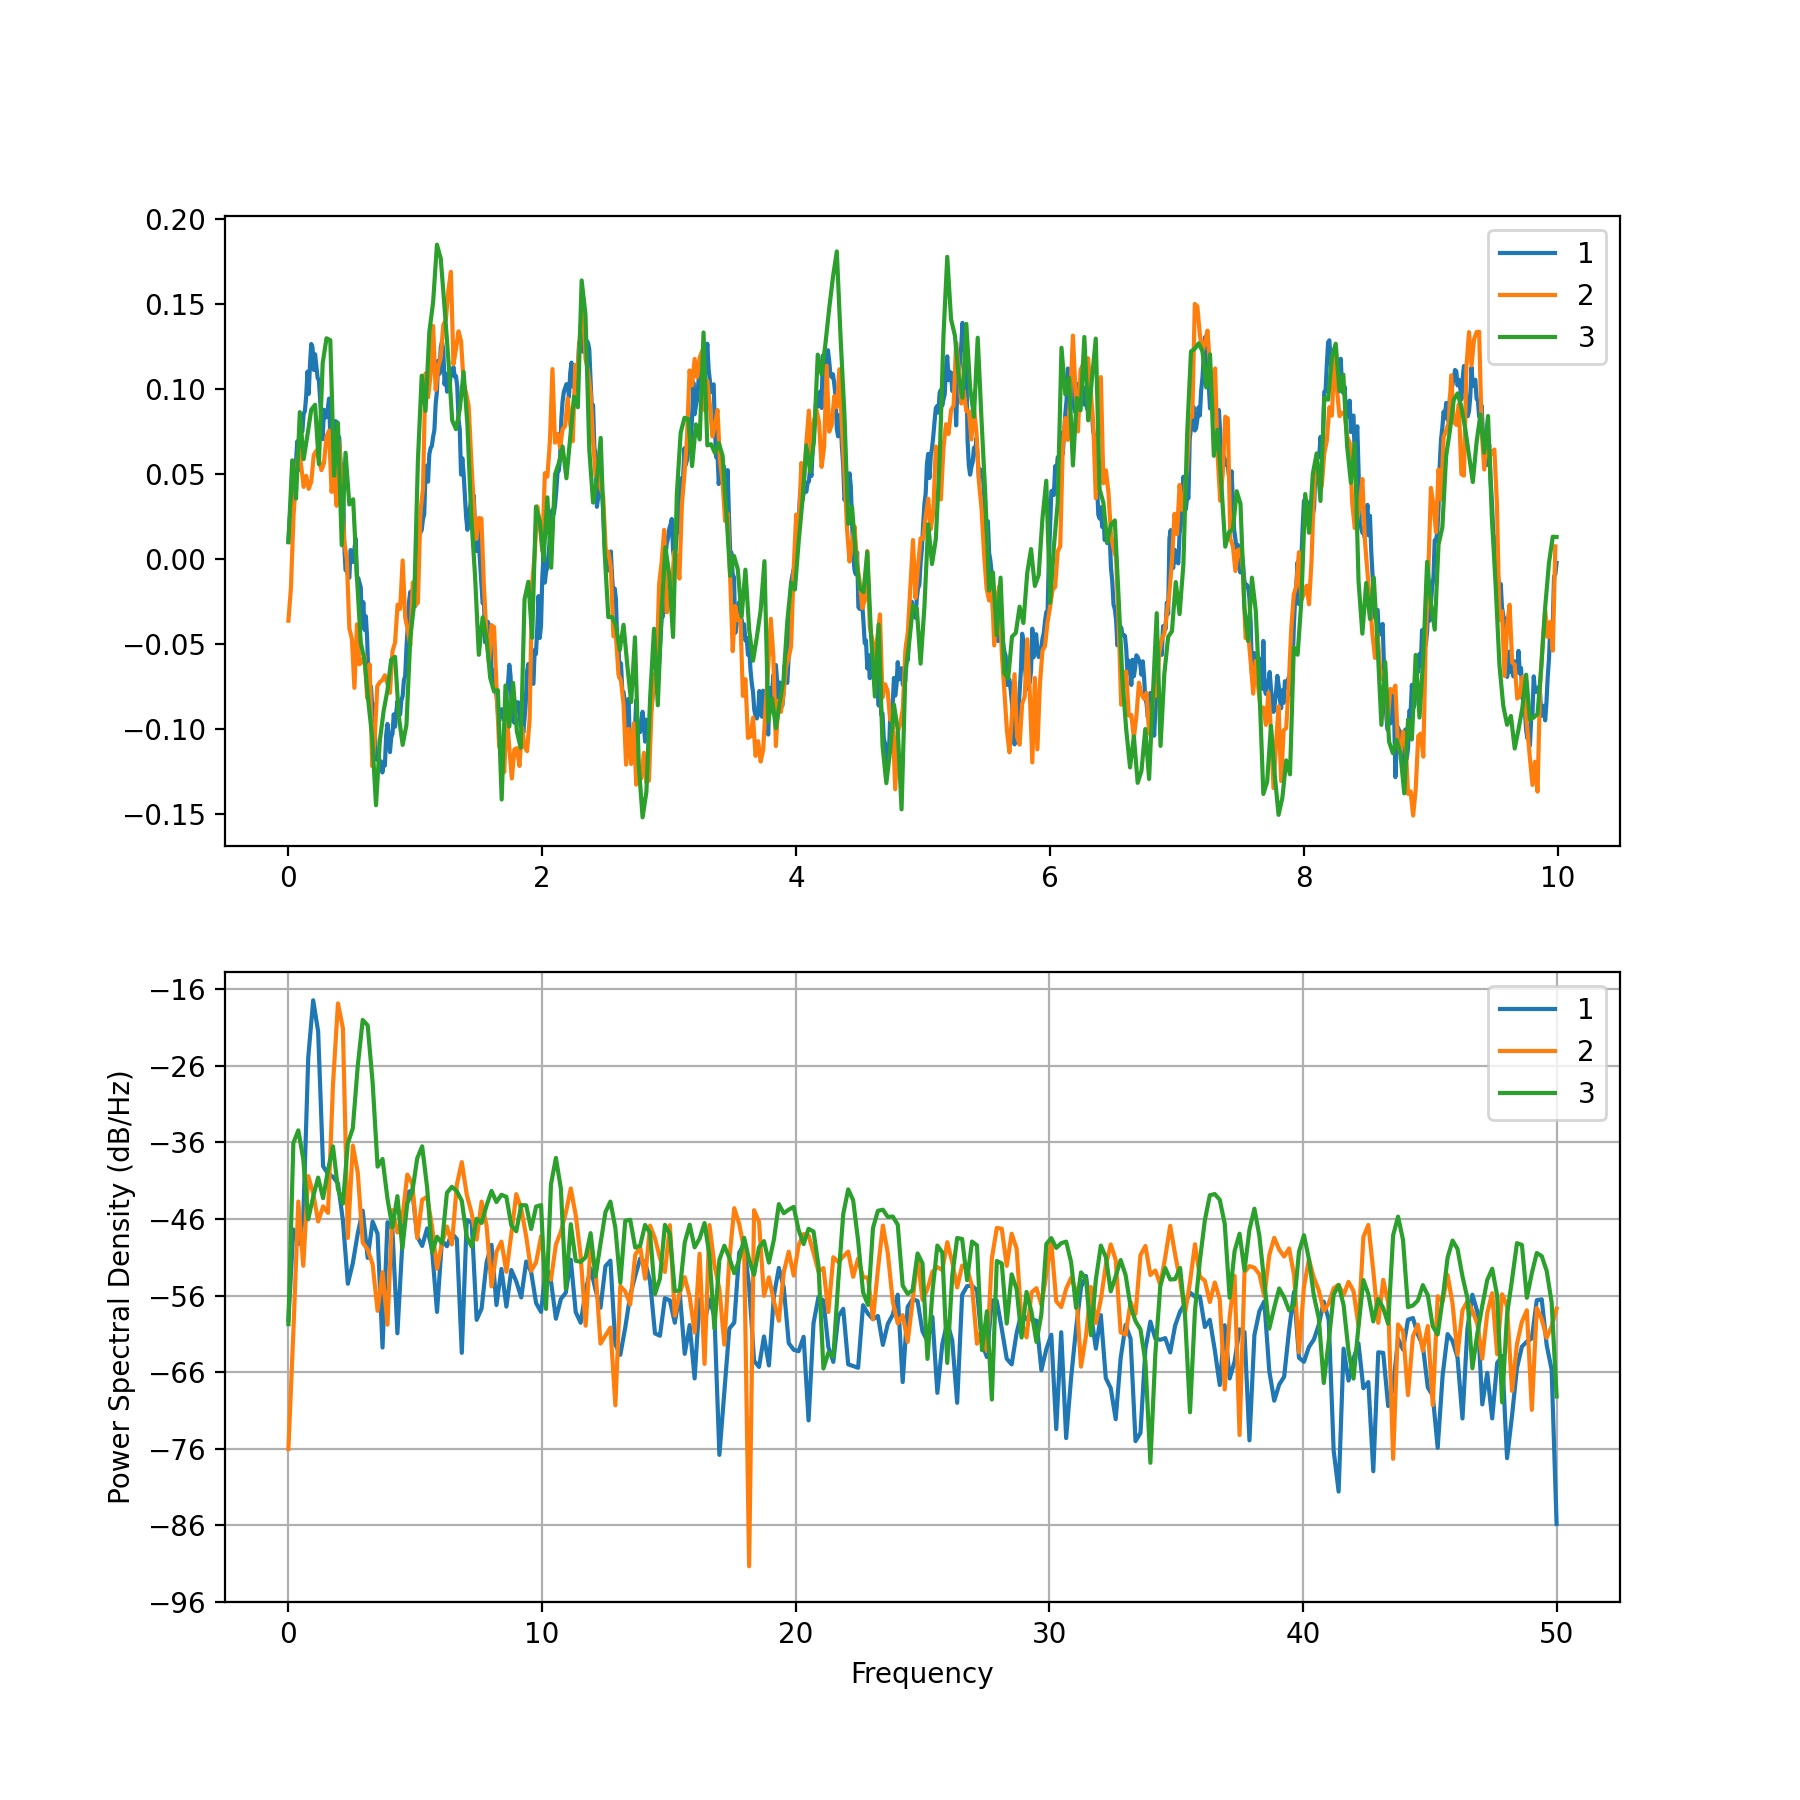

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,9))

for n in [1,2,3]:
    dt = 0.01*n
    t = np.arange(0, 10, dt)
    nse = np.random.randn(len(t))
    r = np.exp(-t / 0.05)
    cnse = np.convolve(nse, r) * dt
    cnse = cnse[:len(t)]
    s = 0.1 * np.sin(2 * np.pi *t) + cnse
    ax[0].plot(t, s, label=n)
    ax[1].psd(s, 512, 1 / dt, label=n)
ax[0].legend()
ax[1].legend()

<IPython.core.display.Javascript object>


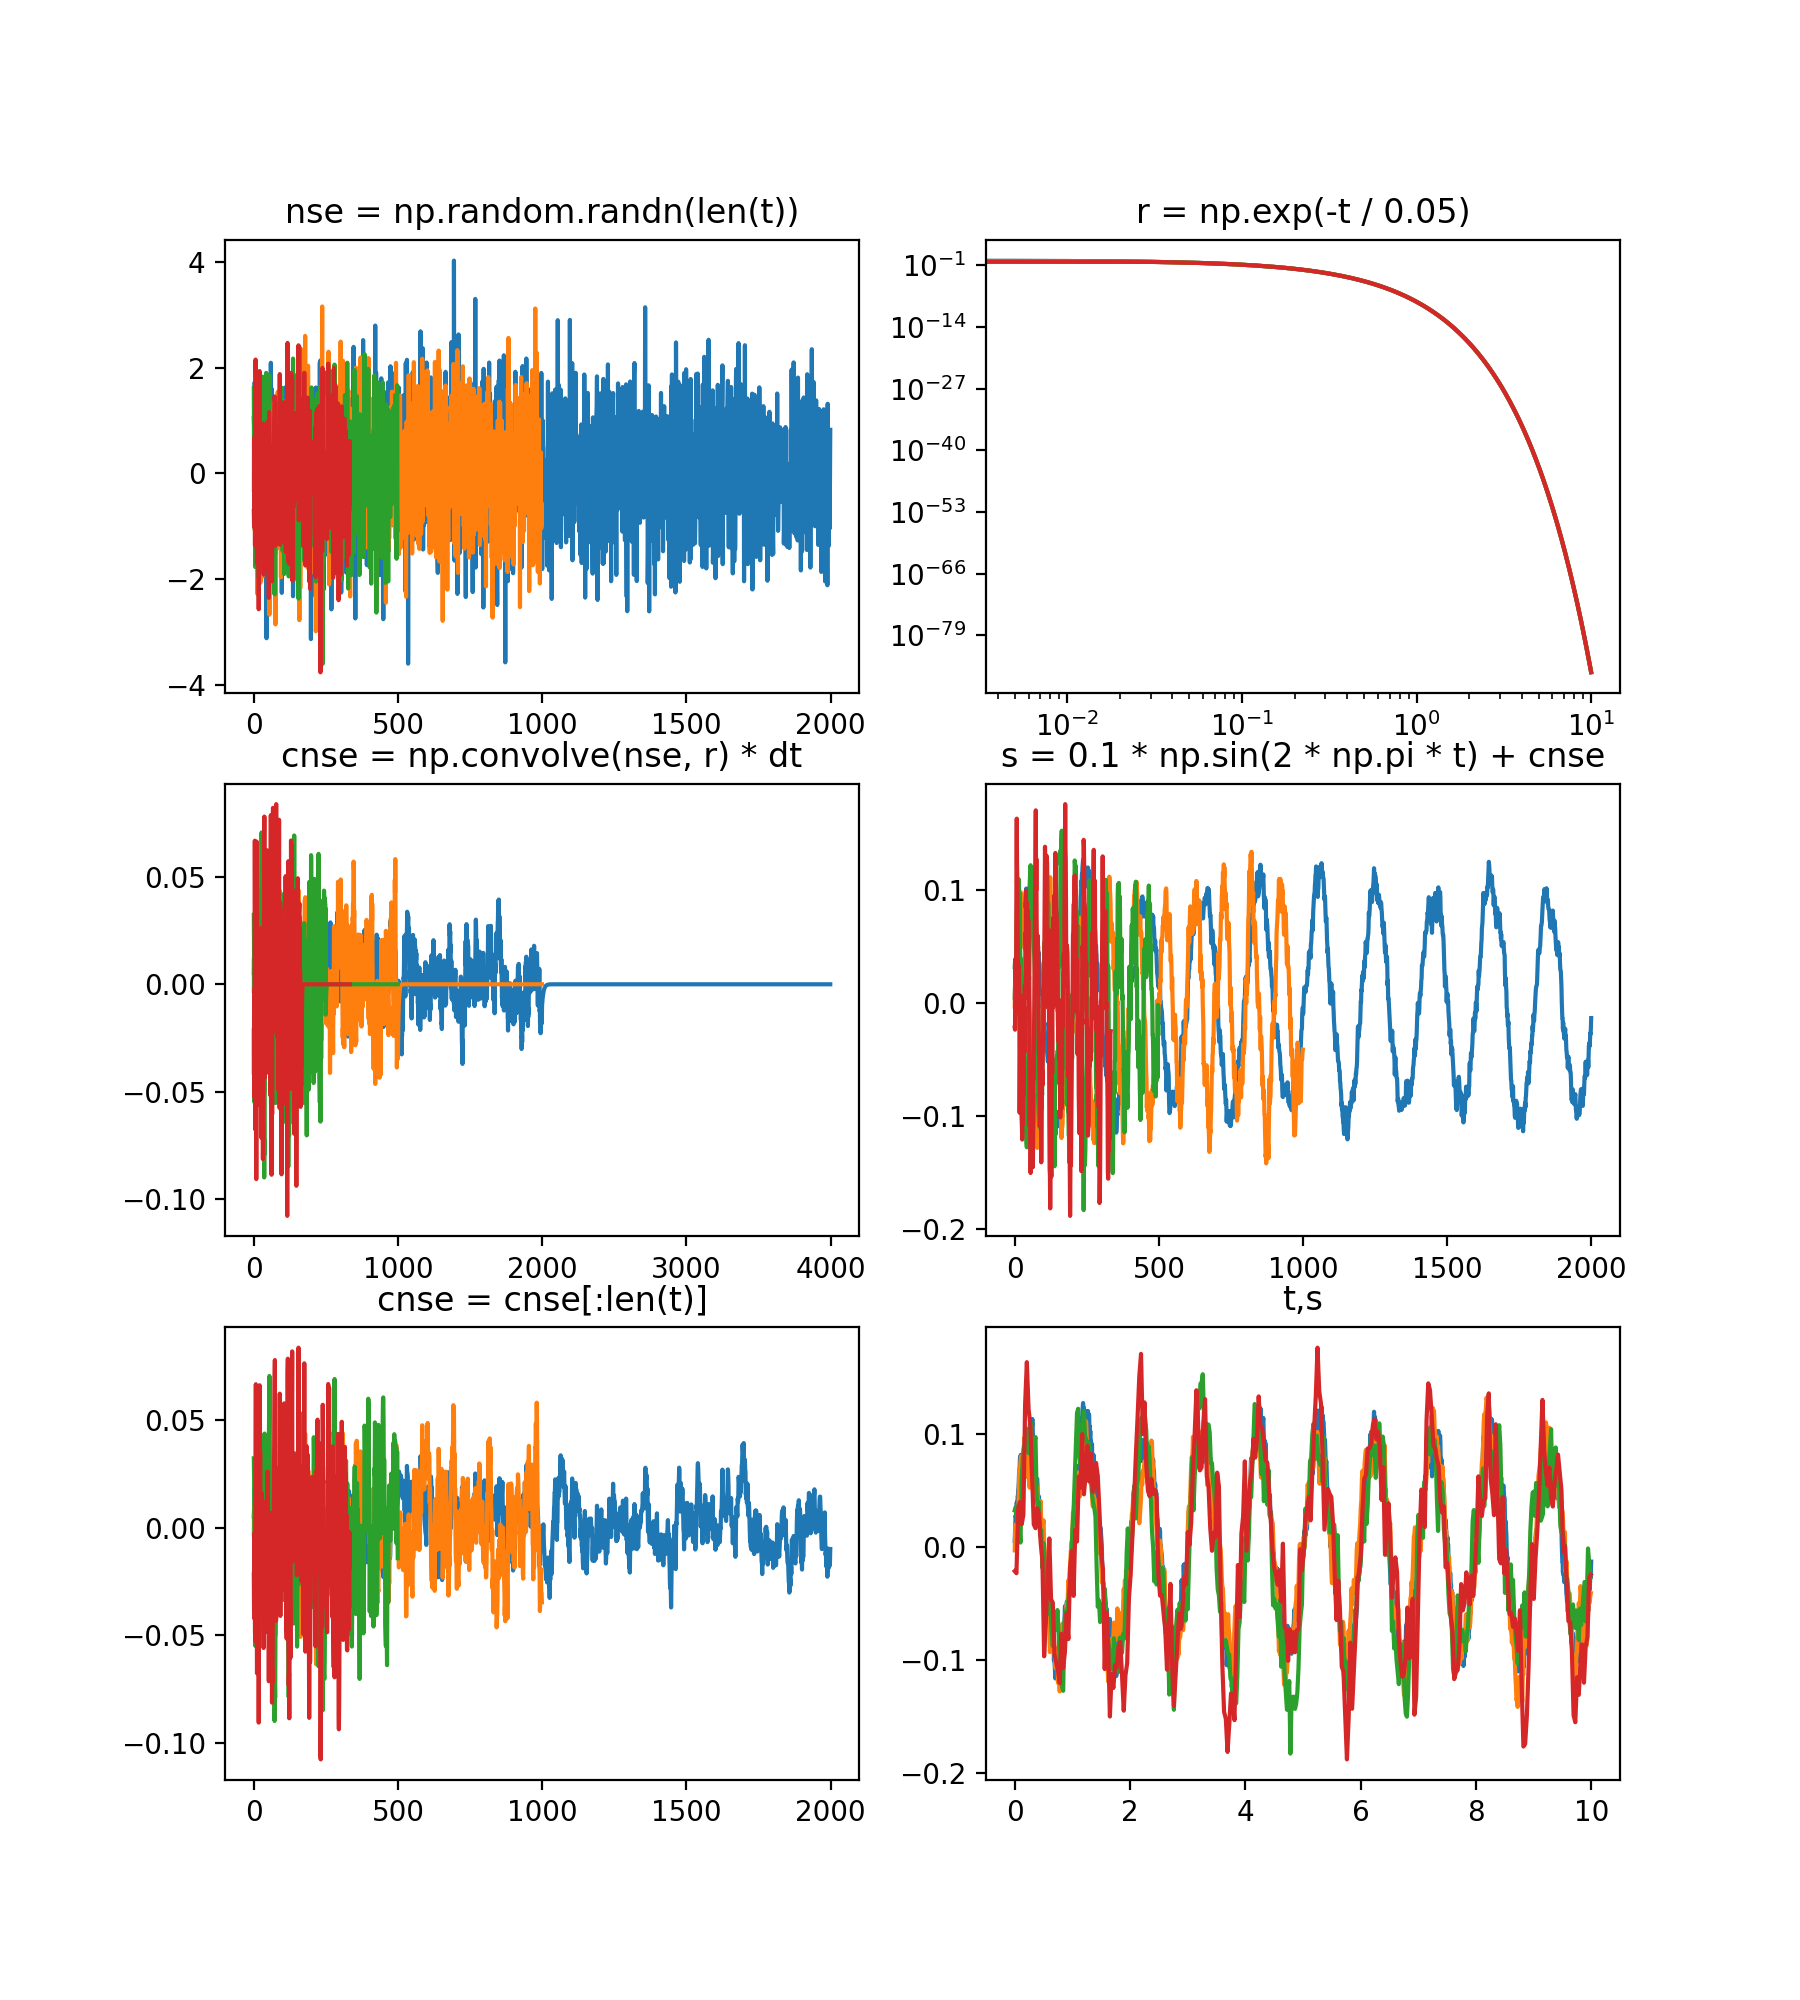

<IPython.core.display.Javascript object>


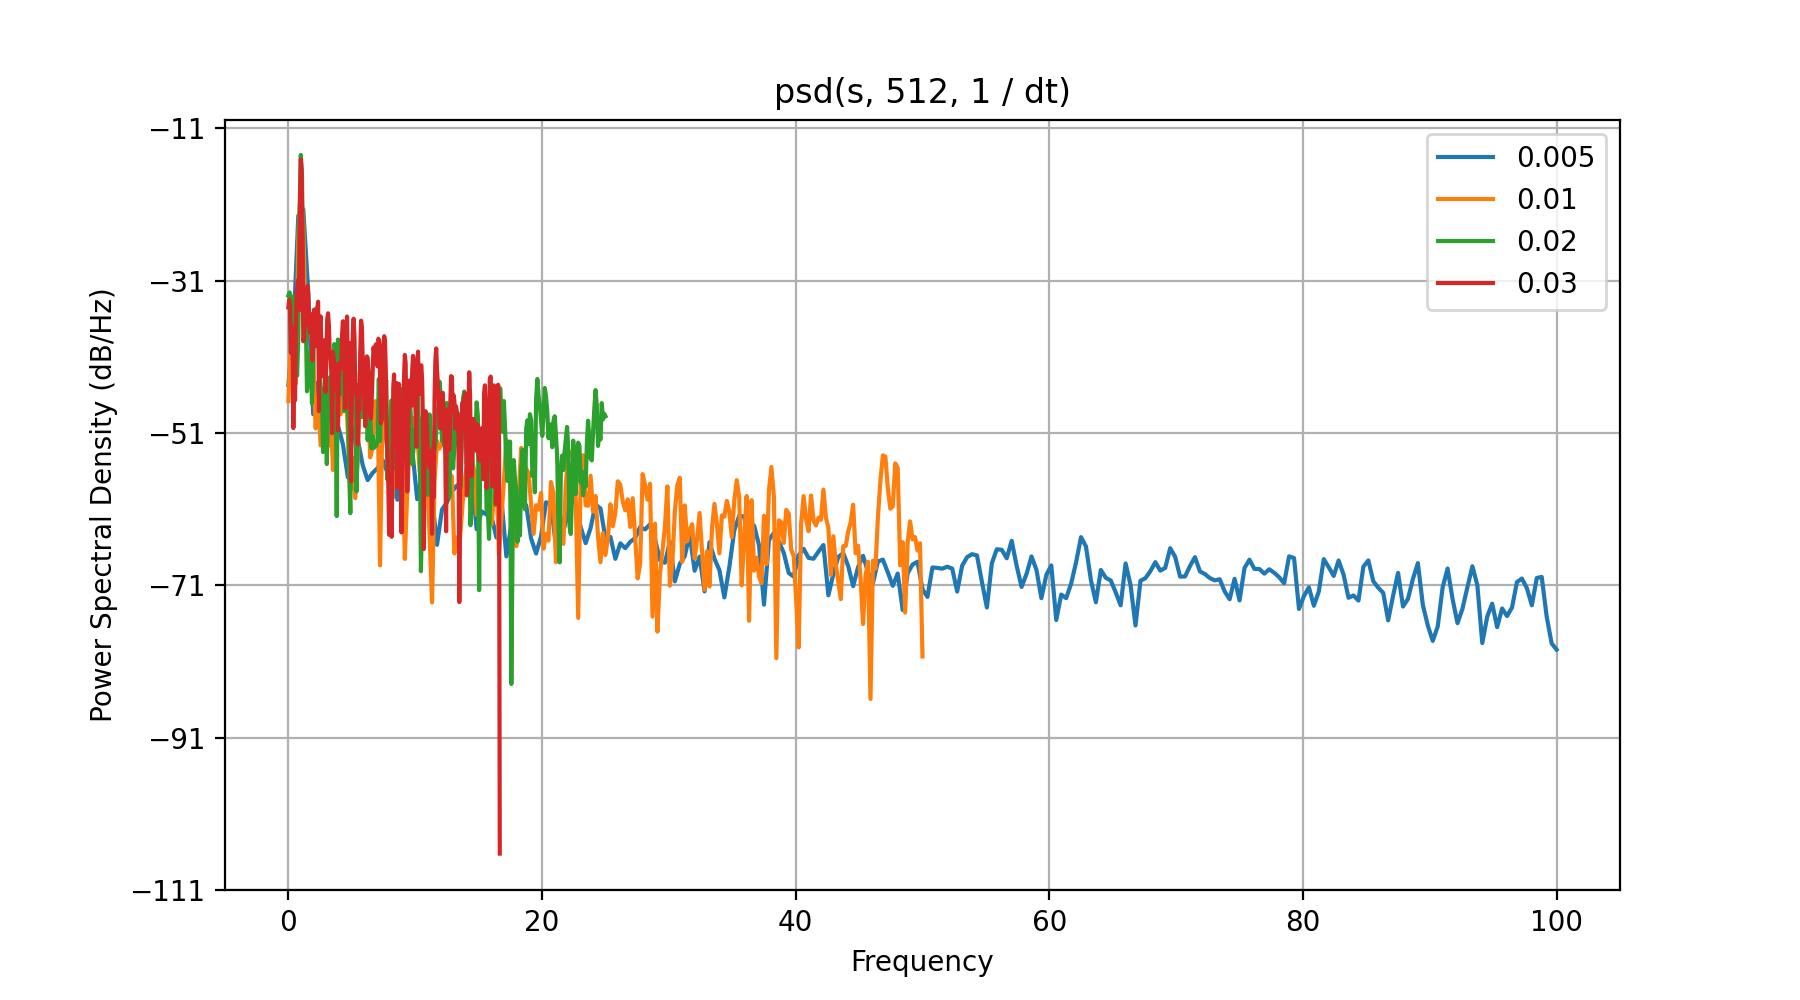

In [121]:
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

for dt in [0.005,0.01,0.02,0.03]:
    t = np.arange(0, 10, dt)
    nse = np.random.randn(len(t))
    ax1[0,0].set_title('nse = np.random.randn(len(t))')
    ax1[0,0].plot(nse)
    
    r = np.exp(-t / 0.05)
    ax1[0,1].set_title('r = np.exp(-t / 0.05)')
    ax1[0,1].loglog(t,r)
    
    cnse = np.convolve(nse, r) * dt
    ax1[1,0].set_title('cnse = np.convolve(nse, r) * dt')
    ax1[1,0].plot(cnse)
    
    cnse = cnse[:len(t)]
    ax1[2,0].set_title('cnse = cnse[:len(t)]')
    ax1[2,0].plot(cnse)
    
    s = 0.1 * np.sin(2 * np.pi * t) + cnse
    ax1[1,1].set_title('s = 0.1 * np.sin(2 * np.pi * t) + cnse')
    ax1[1,1].plot(s)
    
    ax1[2,1].set_title('t,s')
    ax1[2,1].plot(t, s)
    
    ax2.set_title('psd(s, 512, 1 / dt)')
    ax2.psd(s, 512, 1 / dt,label=dt)
ax2.legend()

<IPython.core.display.Javascript object>


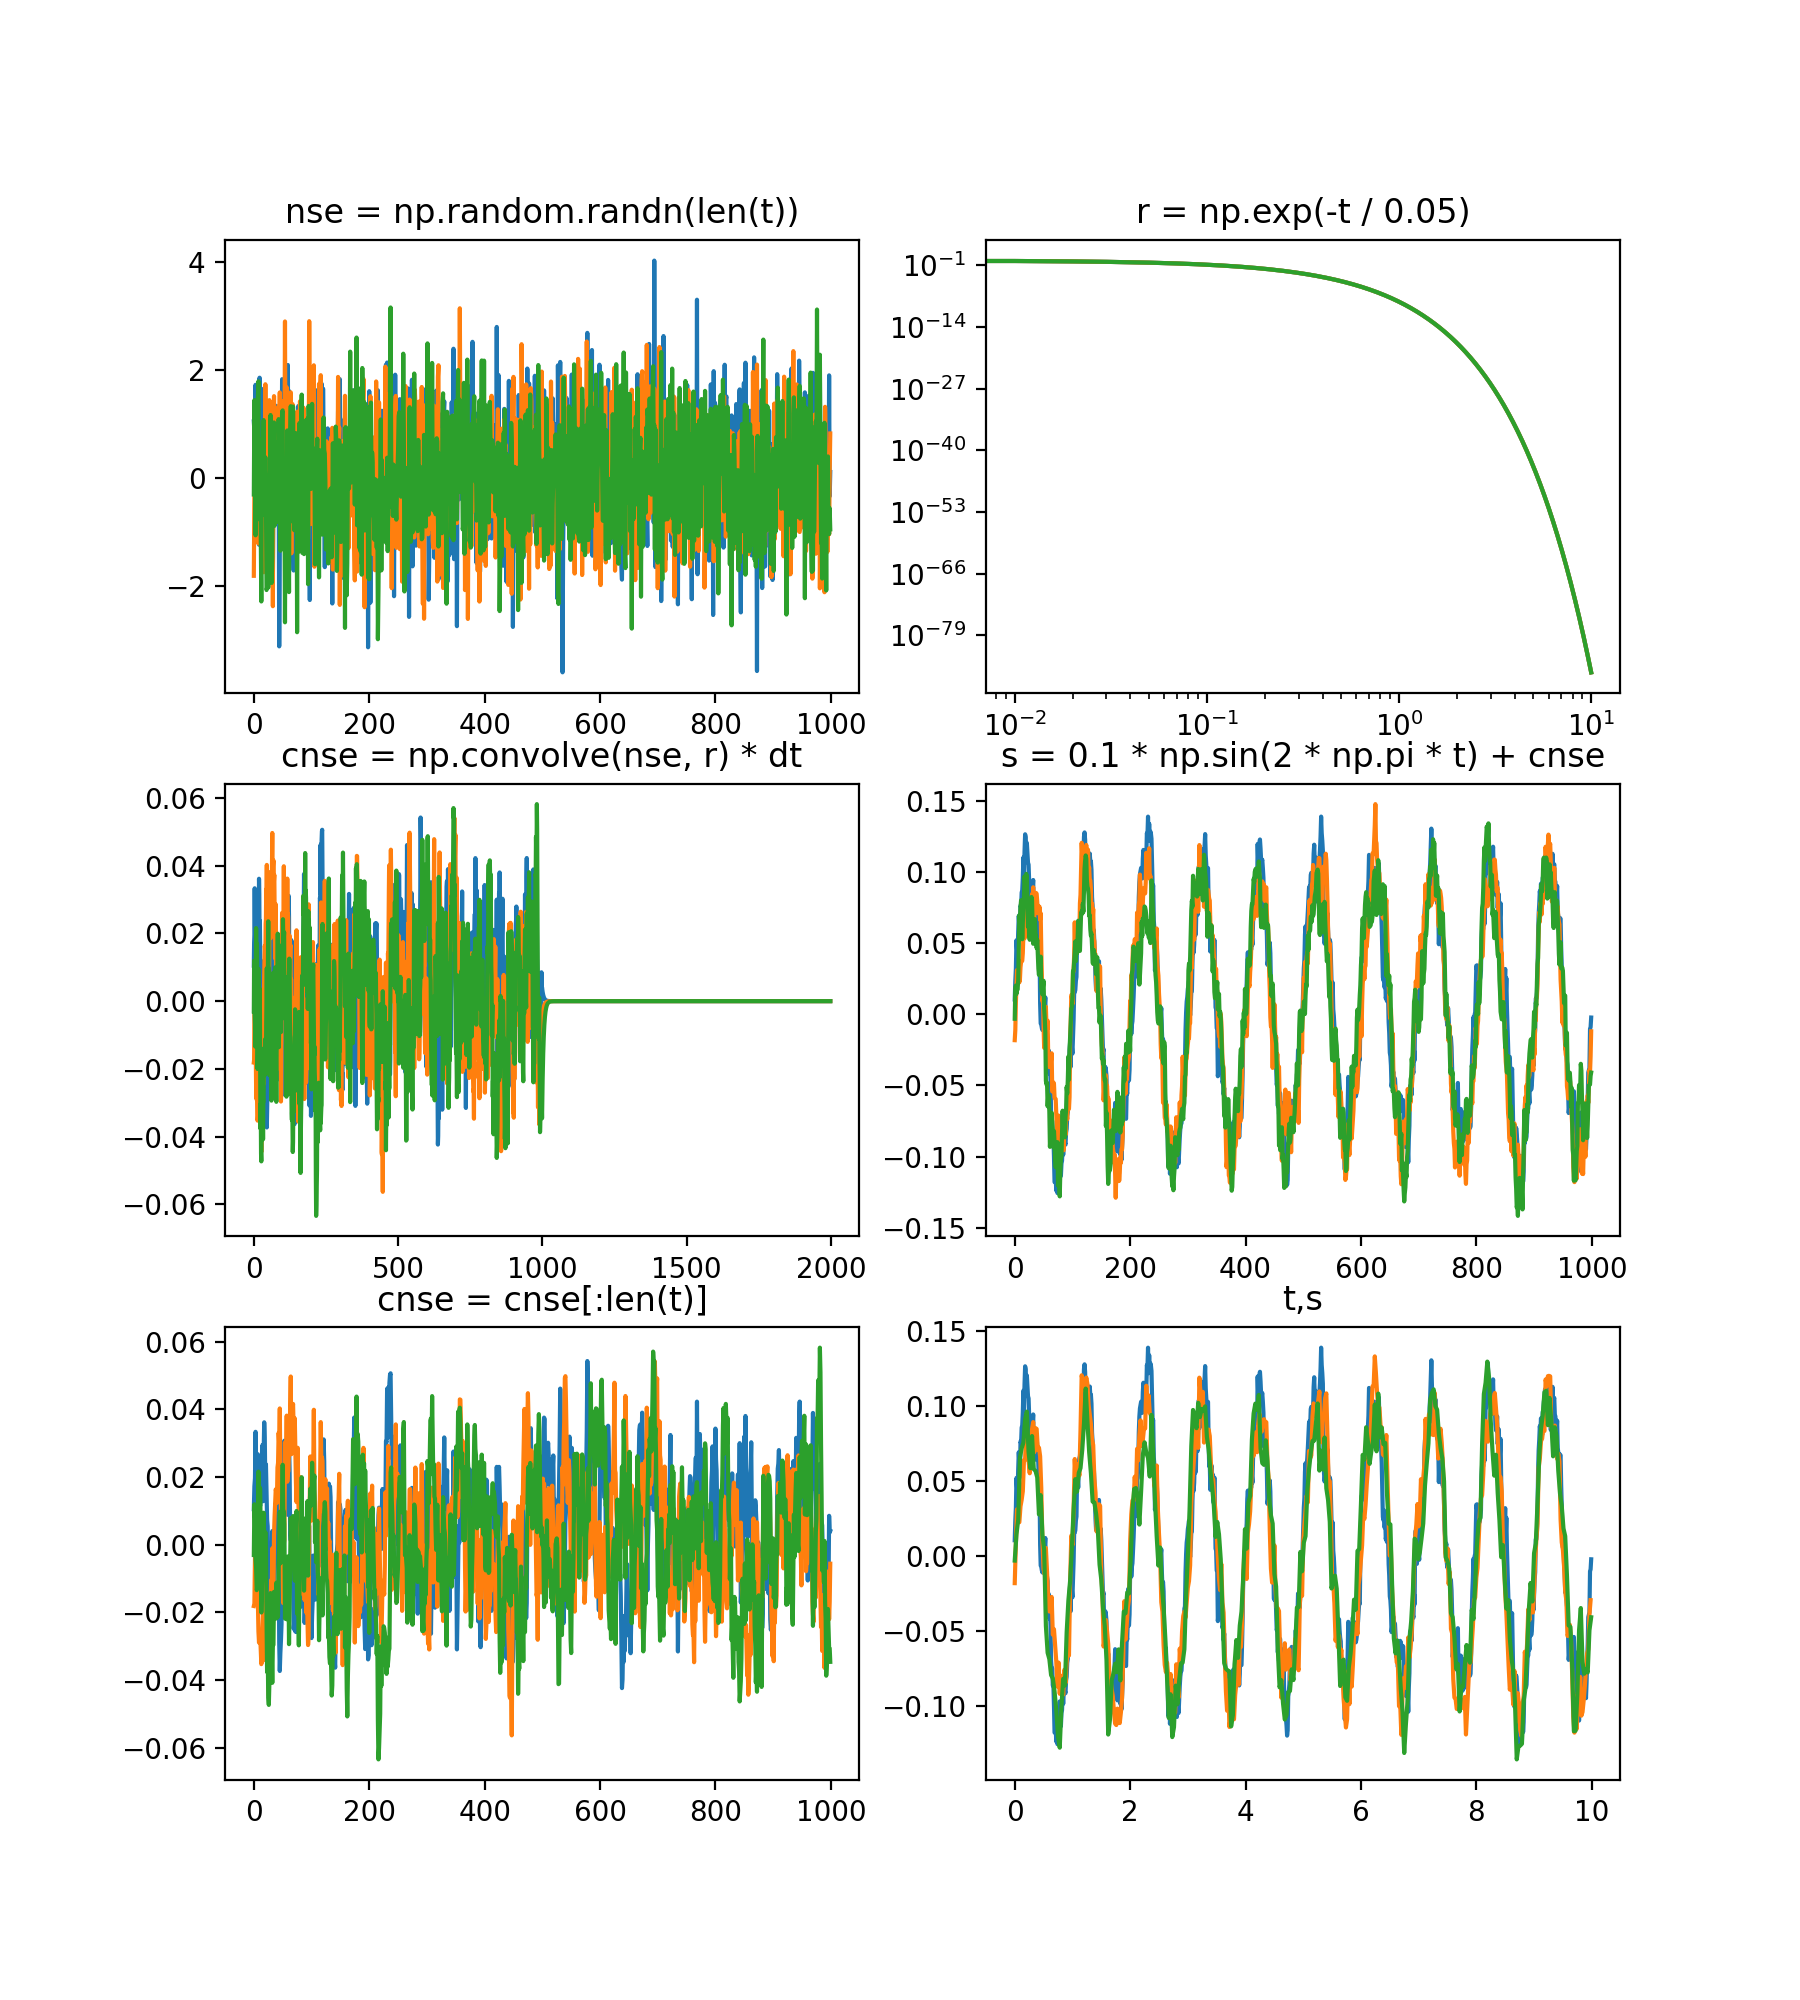

<IPython.core.display.Javascript object>


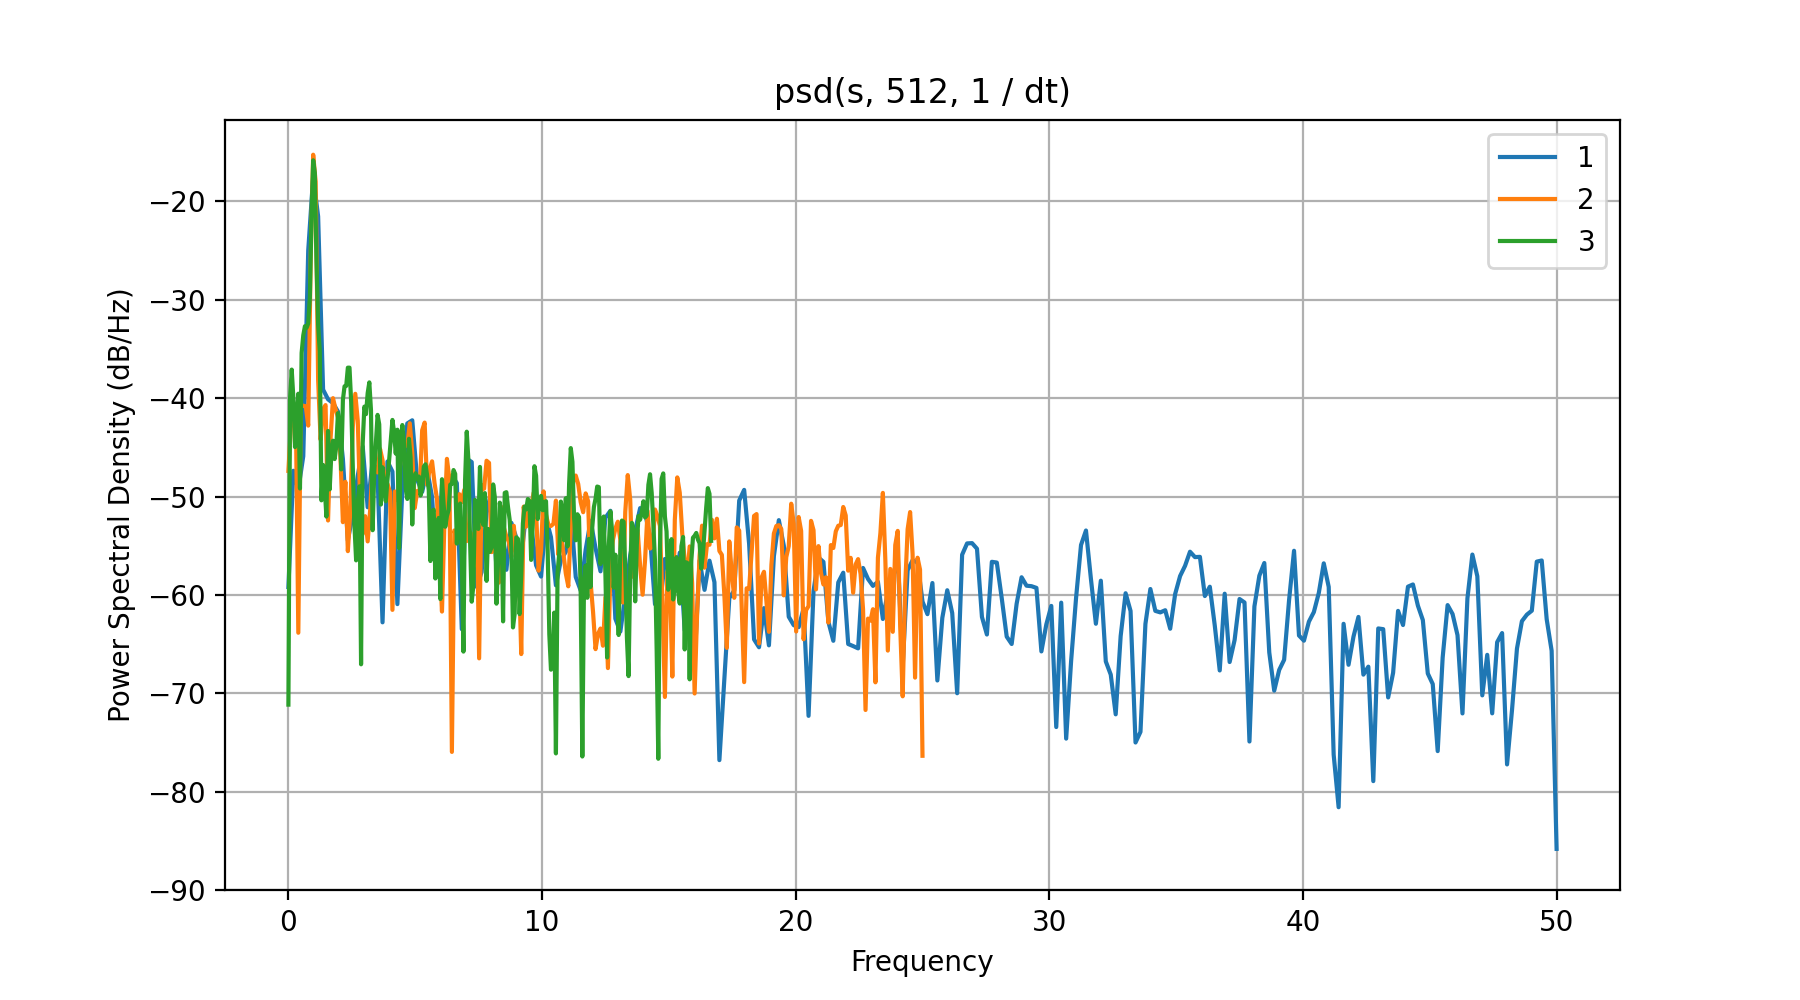

In [127]:
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

for n in [1,2,3]:
    dt = 0.01
    t = np.arange(0, 10, dt)
    nse = np.random.randn(len(t))
    ax1[0,0].set_title('nse = np.random.randn(len(t))')
    ax1[0,0].plot(nse)
    
    r = np.exp(-t / 0.05)
    ax1[0,1].set_title('r = np.exp(-t / 0.05)')
    ax1[0,1].loglog(t,r)
    
    cnse = np.convolve(nse, r) * dt
    ax1[1,0].set_title('cnse = np.convolve(nse, r) * dt')
    ax1[1,0].plot(cnse)
    
    cnse = cnse[:len(t)]
    ax1[2,0].set_title('cnse = cnse[:len(t)]')
    ax1[2,0].plot(cnse)
    
    s = 0.1 * np.sin(2 * np.pi * t) + cnse
    ax1[1,1].set_title('s = 0.1 * np.sin(2 * np.pi * t) + cnse')
    ax1[1,1].plot(s)
    
    ax1[2,1].set_title('t,s')
    ax1[2,1].plot(t[::n], s[::n])
    
    ax2.set_title('psd(s, 512, 1 / dt)')
    ax2.psd(s[::n], 512, 1 / (dt*n),label=n)
ax2.legend()

<IPython.core.display.Javascript object>


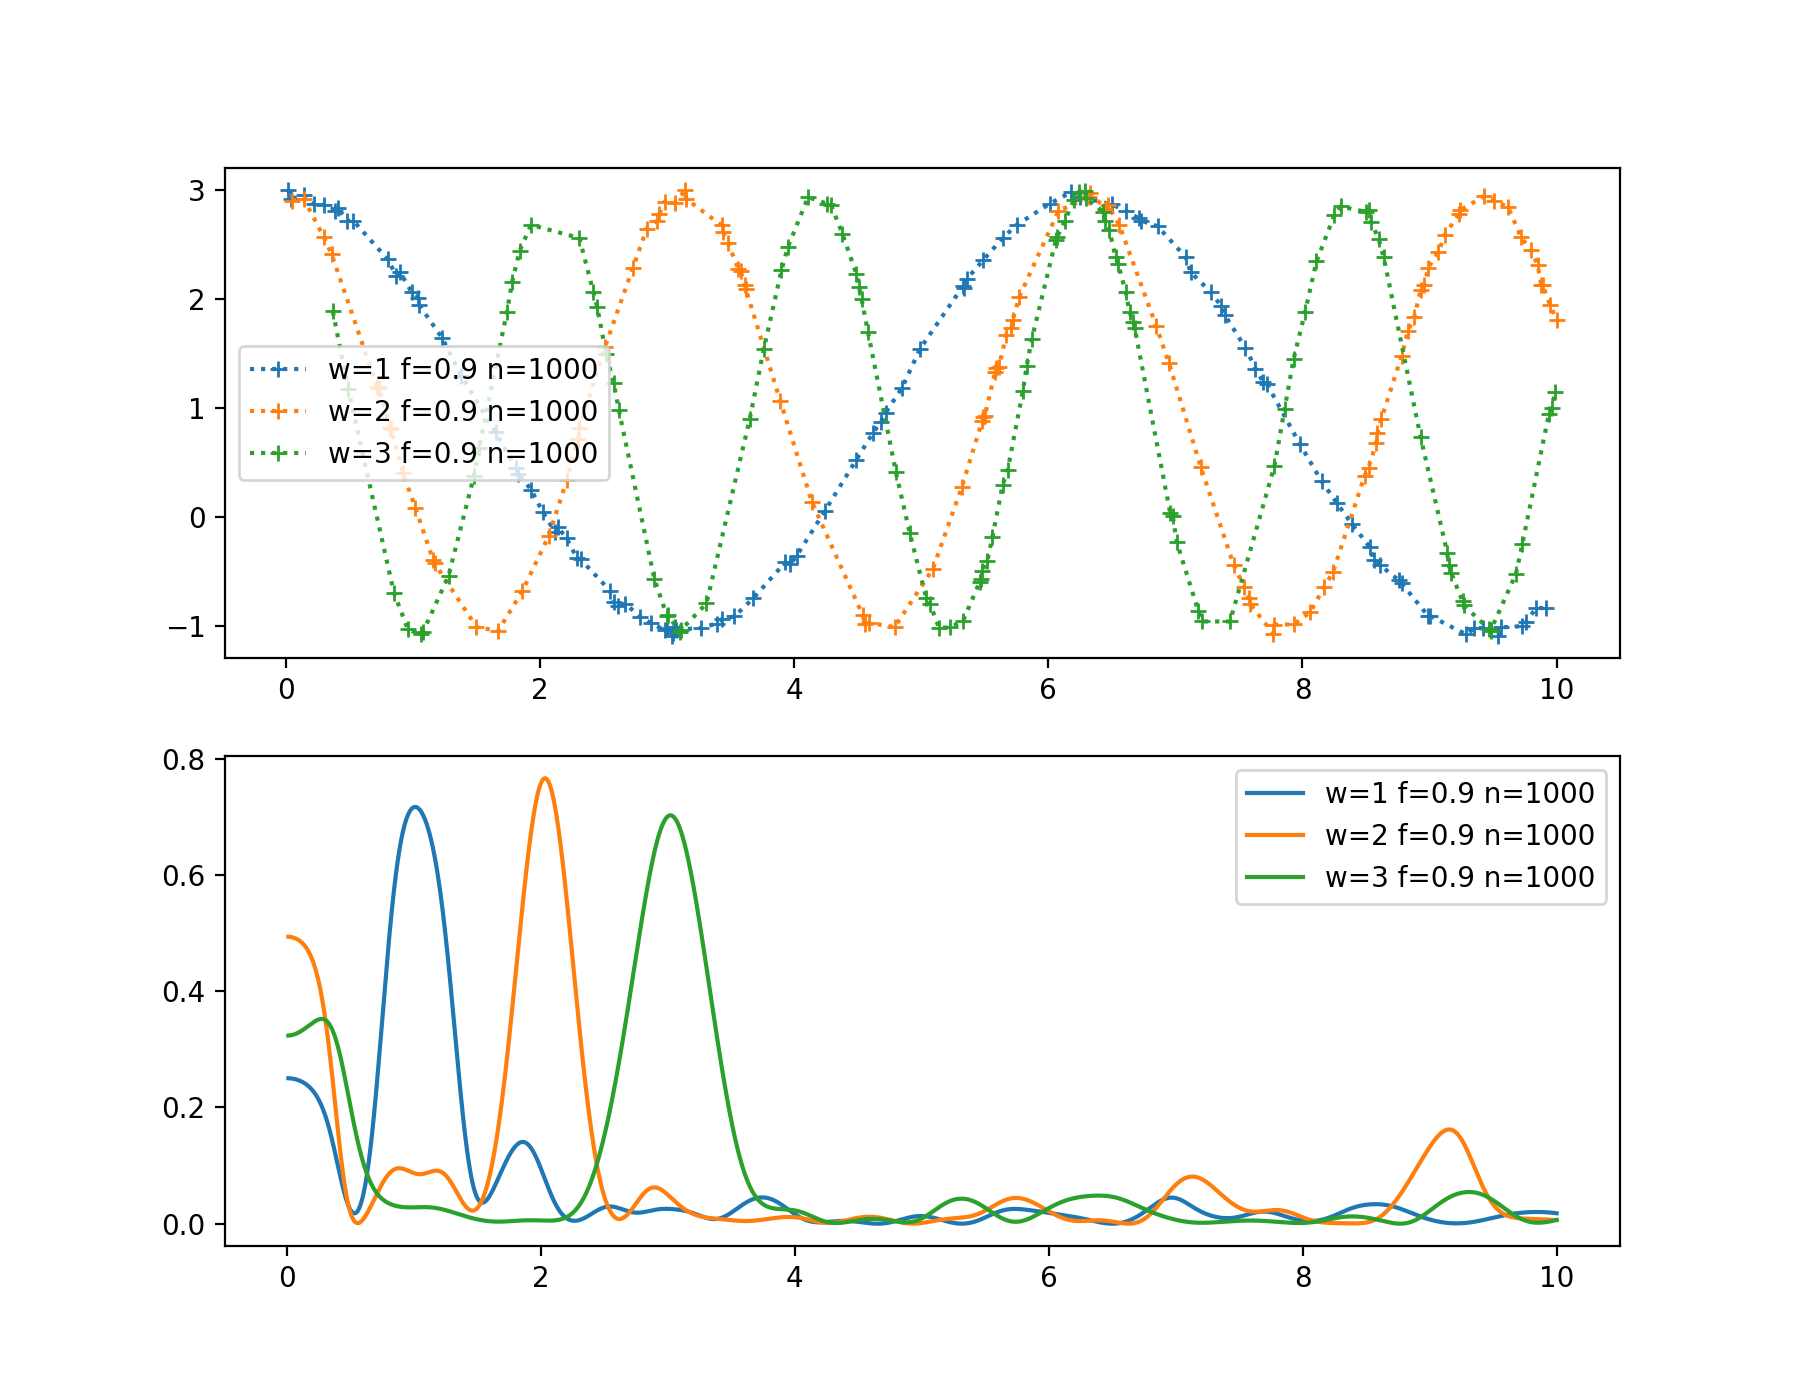

In [196]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

for frac_points in [0.9]:
    for w in [1,2,3]:
        for nin in [1000]:
            A = 2.
            phi = 0.5 * np.pi
#            nin = 1000
            nout = 100000
#            frac_points = 0.9 # Fraction of points to select
            
            #Randomly select a fraction of an array with timesteps:
            r = np.random.rand(nin)
#            x = np.linspace(0.01, 10*np.pi, nin)
            x = np.linspace(0.01, 10, nin)
            x = x[r >= frac_points]
            
            #Plot a sine wave for the selected times:
            y = A * np.sin(w*x+phi) + 1*r[r >= frac_points]
            
            #Define the array of frequencies for which to compute the periodogram:
            f = np.linspace(0.01, 10, nout)
            
            #Calculate Lomb-Scargle periodogram:
            pgram = signal.lombscargle(x, y, f, normalize=True)
            
            #Now make a plot of the input data:
            ax[0].plot(x, y, '+:', label='w=%s f=%s n=%s' %(w,frac_points,nin))
            
            #Then plot the normalized periodogram:
            ax[1].plot(f, pgram, label='w=%s f=%s n=%s' %(w,frac_points,nin))
ax[0].legend()
ax[1].legend()

<IPython.core.display.Javascript object>


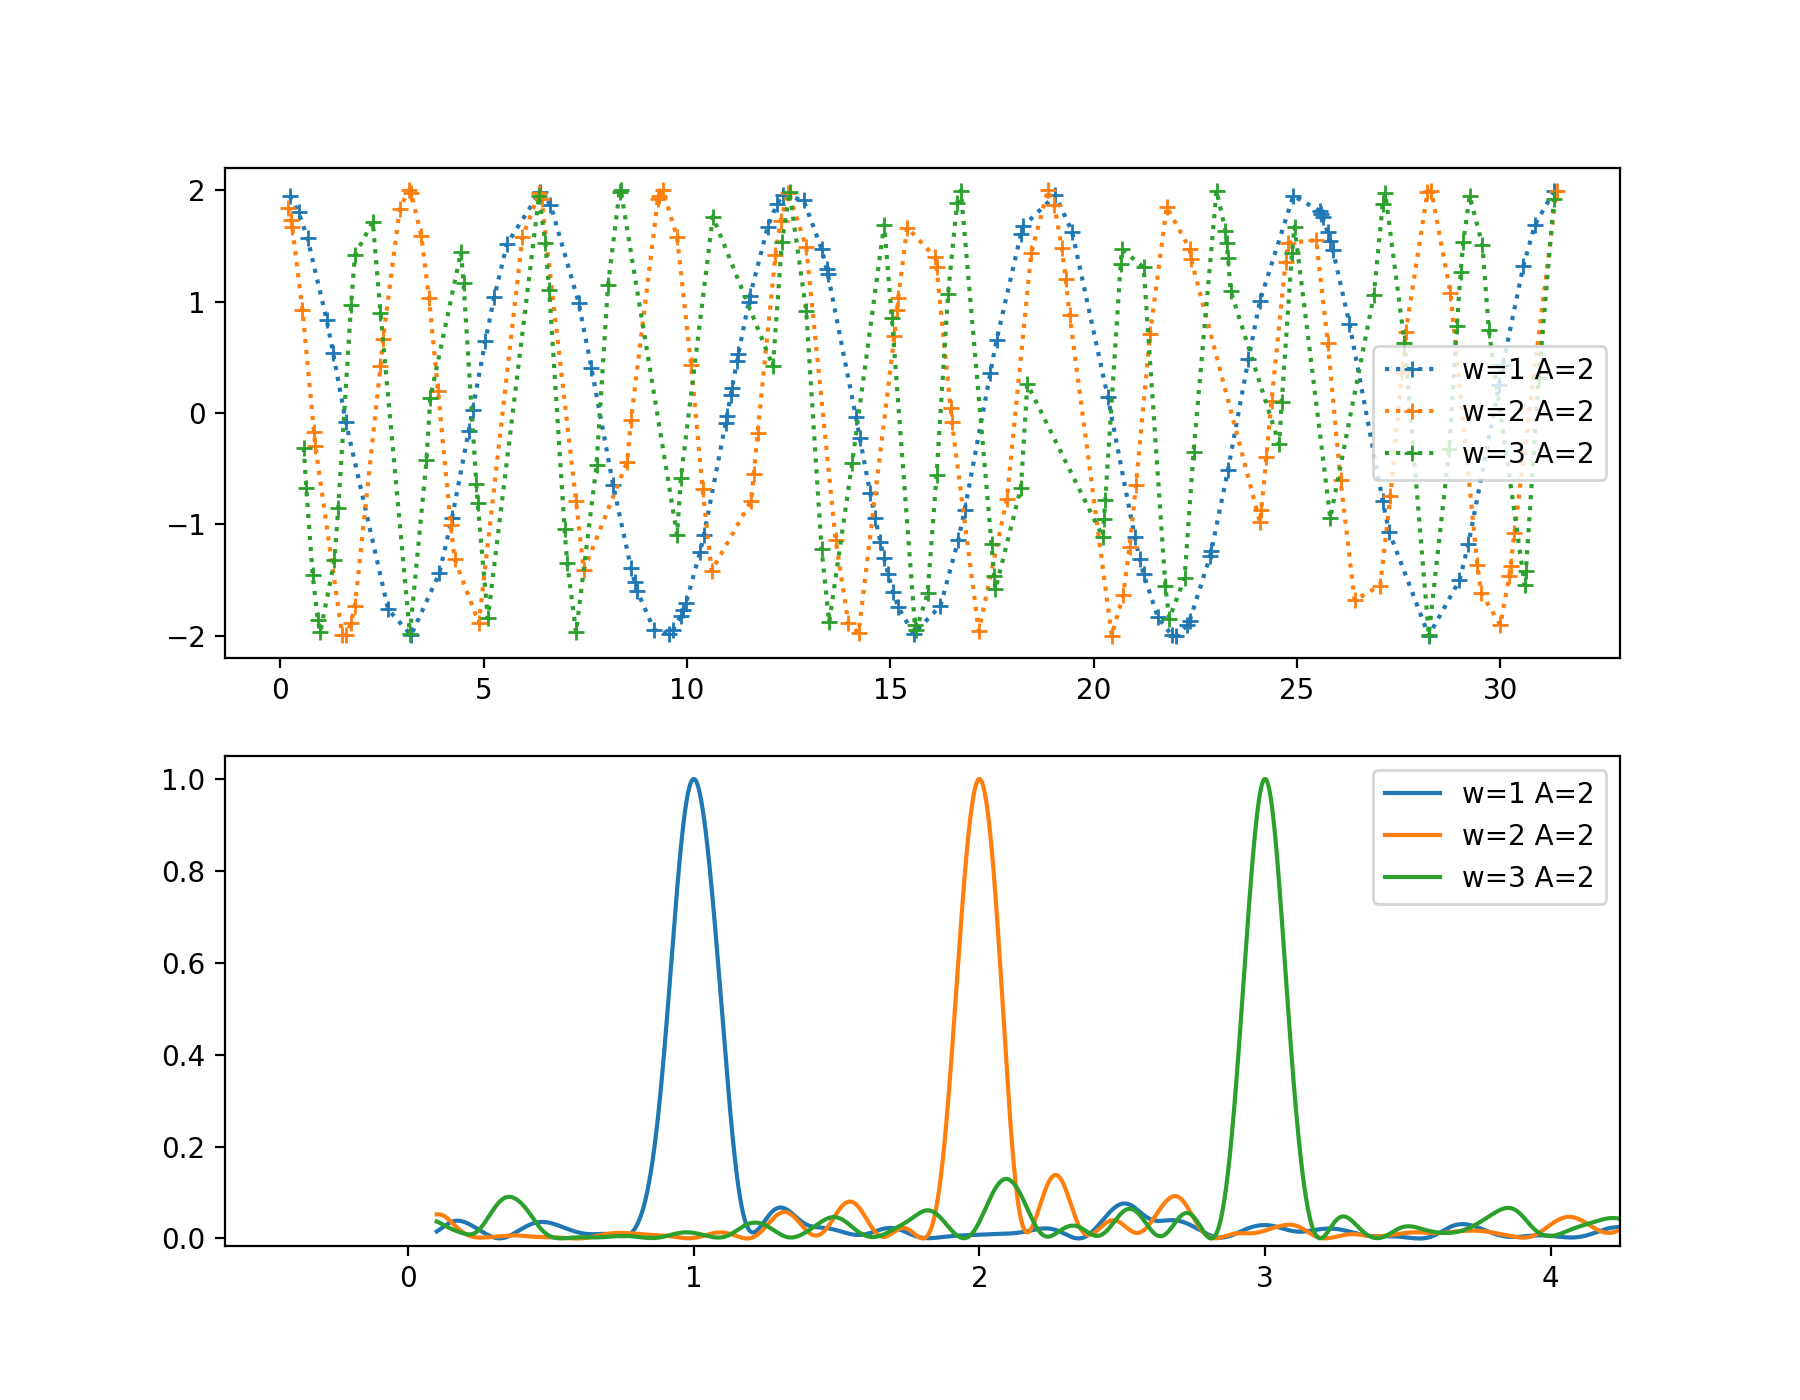

89
100000


In [192]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

for frac_points in [0.9]:
    for w in [1,2,3]:
        for nin in [1000]:
            for phi in [0.5* np.pi]:#[0.4* np.pi,0.5* np.pi,0.6* np.pi]:
                for A in [2]:
#                    A = 2.
#                    phi = 0.5 * np.pi
        #            nin = 1000
                    nout = 100000
        #            frac_points = 0.9 # Fraction of points to select
                    
                    #Randomly select a fraction of an array with timesteps:
                    r = np.random.rand(nin)
                    x = np.linspace(0.01, 10*np.pi, nin)
                    x = x[r >= frac_points]
                    
                    #Plot a sine wave for the selected times:
                    y = A * np.sin(w*x+phi) #+ 1*r[r >= frac_points]
                    
                    #Define the array of frequencies for which to compute the periodogram:
                    f = np.logspace(-1, 2, nout)
#                    f = np.linspace(0.01, 2, nout)
                    
                    #Calculate Lomb-Scargle periodogram:
                    pgram = signal.lombscargle(x, y, f, normalize=True)
                    
                    #Now make a plot of the input data:
                    ax[0].plot(x, y, '+:', label='w=%s A=%s' %(w,A))
                    
                    #Then plot the normalized periodogram:
                    ax[1].plot(f, pgram, label='w=%s A=%s' %(w,A))
ax[0].legend()
ax[1].legend()
/print len(x)
/print len(f)

<IPython.core.display.Javascript object>


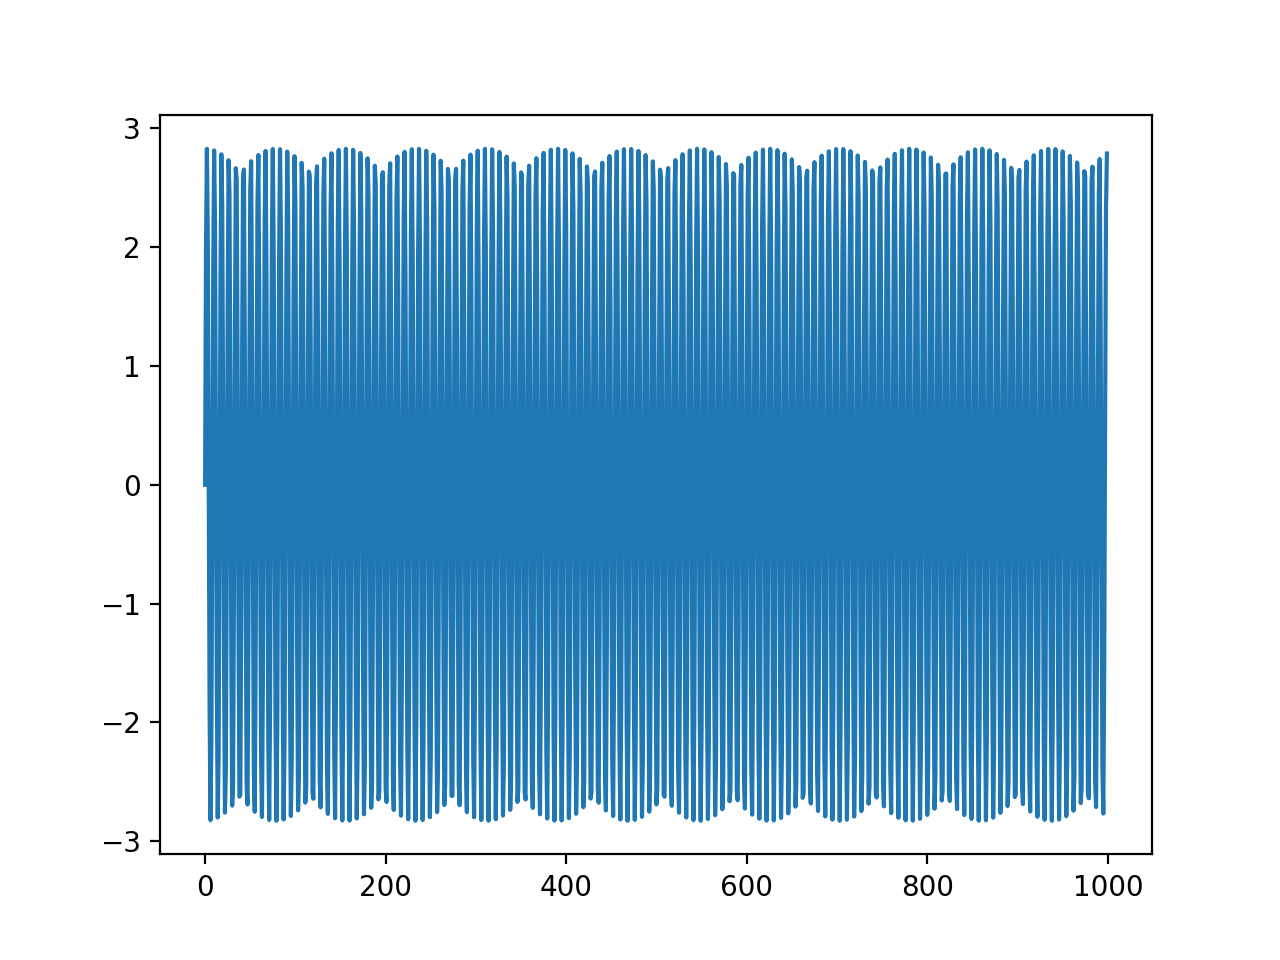

<IPython.core.display.Javascript object>


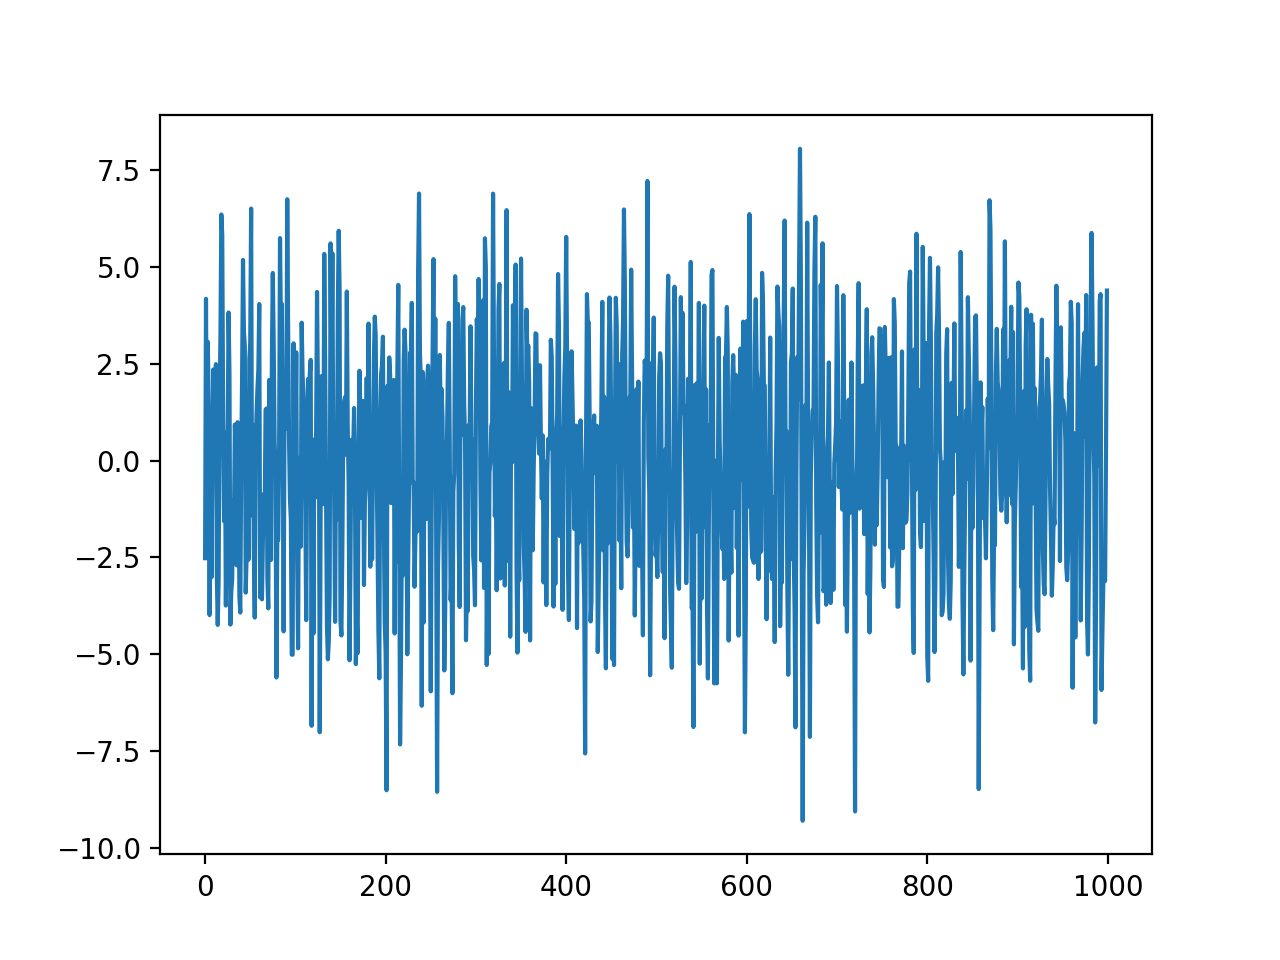

<IPython.core.display.Javascript object>


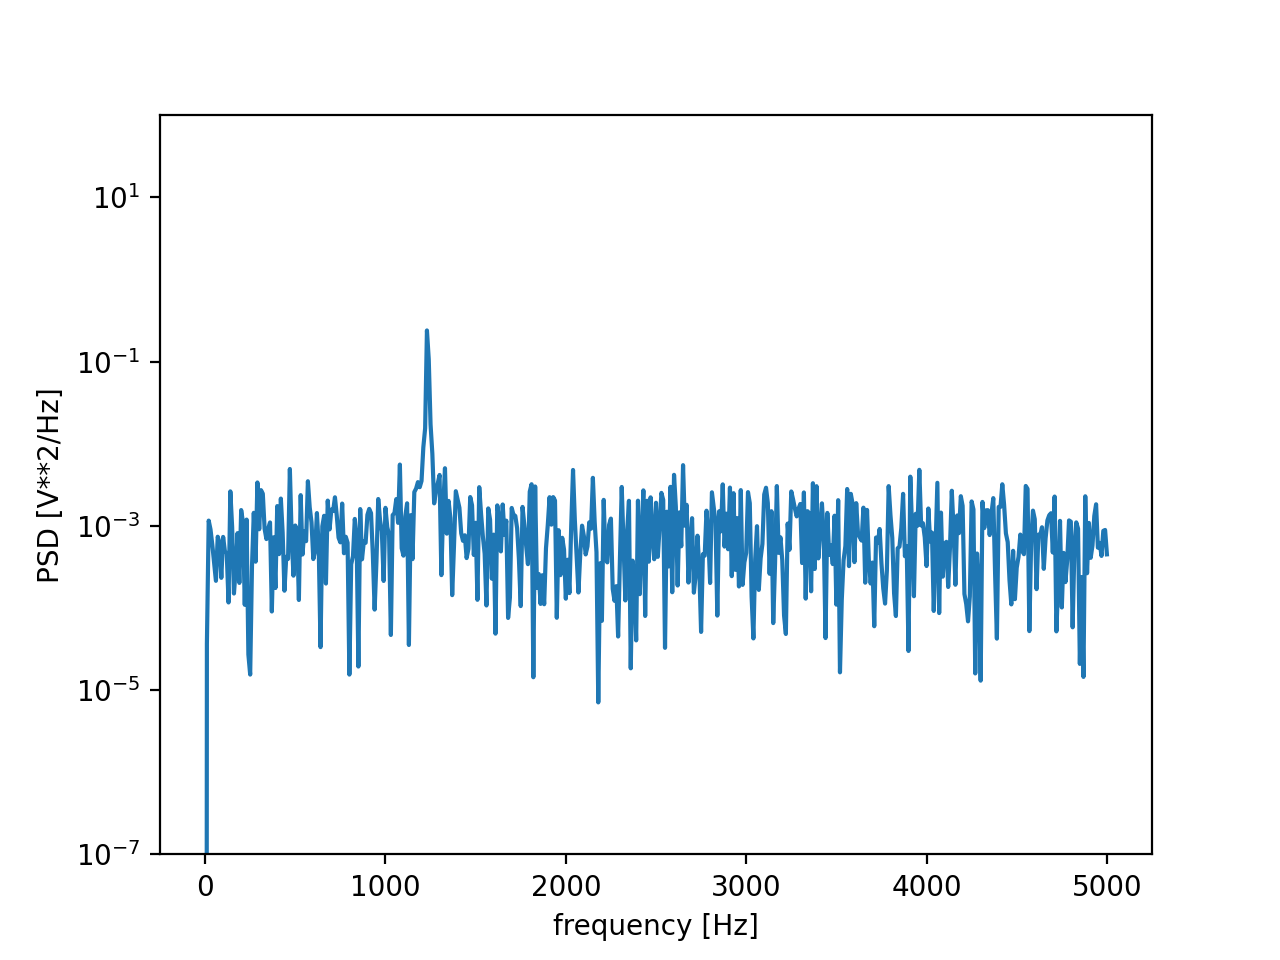

In [10]:
fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
plt.subplots()
plt.plot(x)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
plt.subplots()
plt.plot(x)
f, Pxx_den = signal.periodogram(x, fs)
plt.subplots()
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

<IPython.core.display.Javascript object>


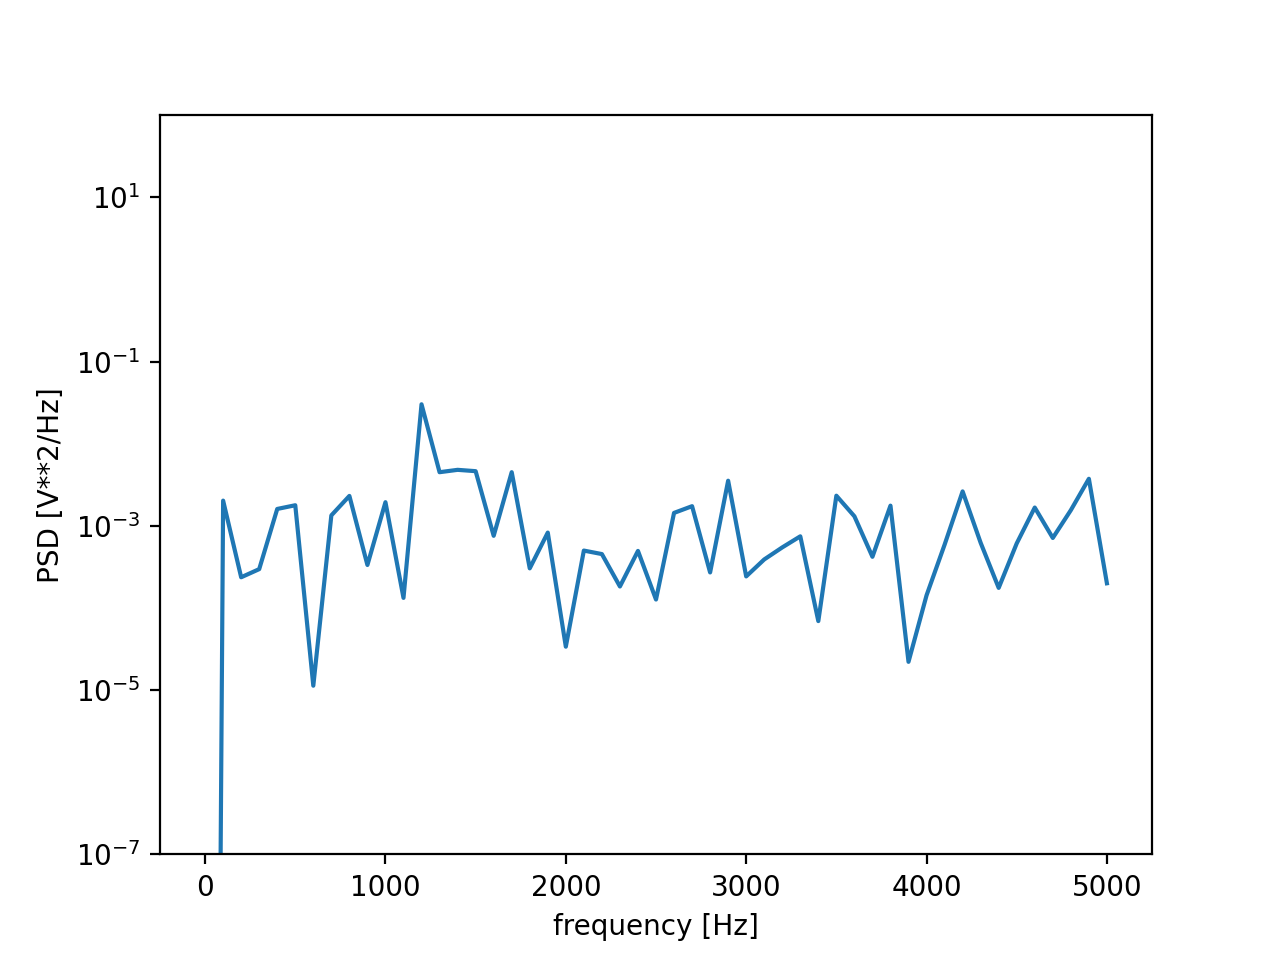

In [9]:
f, Pxx_den = signal.periodogram(x, fs)
plt.subplots()
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [30]:
def findpeaks(series, DELTA):
    """
    Finds extrema in a pandas series data.

    Parameters
    ----------
    series : `pandas.Series`
        The data series from which we need to find extrema.

    DELTA : `float`
        The minimum difference between data values that defines a peak.

    Returns
    -------
    minpeaks, maxpeaks : `list`
        Lists consisting of pos, val pairs for both local minima points and
        local maxima points.
    """
    # Set inital values
    mn, mx = np.Inf, -np.Inf
    minpeaks = []
    maxpeaks = []
    lookformax = True
    start = True
    # Iterate over items in series
    for time_pos, value in series.iteritems():
        if value > mx:
            mx = value
            mxpos = time_pos
        if value < mn:
            mn = value
            mnpos = time_pos
        if lookformax:
            if value < mx-DELTA:
                # a local maxima
                maxpeaks.append((mxpos, mx))
                mn = value
                mnpos = time_pos
                lookformax = False
            elif start:
                # a local minima at beginning
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                start = False
        else:
            if value > mn+DELTA:
                # a local minima
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                lookformax = True
    # check for extrema at end
    if value > mn+DELTA:
        maxpeaks.append((mxpos, mx))
    elif value < mx-DELTA:
        minpeaks.append((mnpos, mn))
    return minpeaks, maxpeaks

<IPython.core.display.Javascript object>


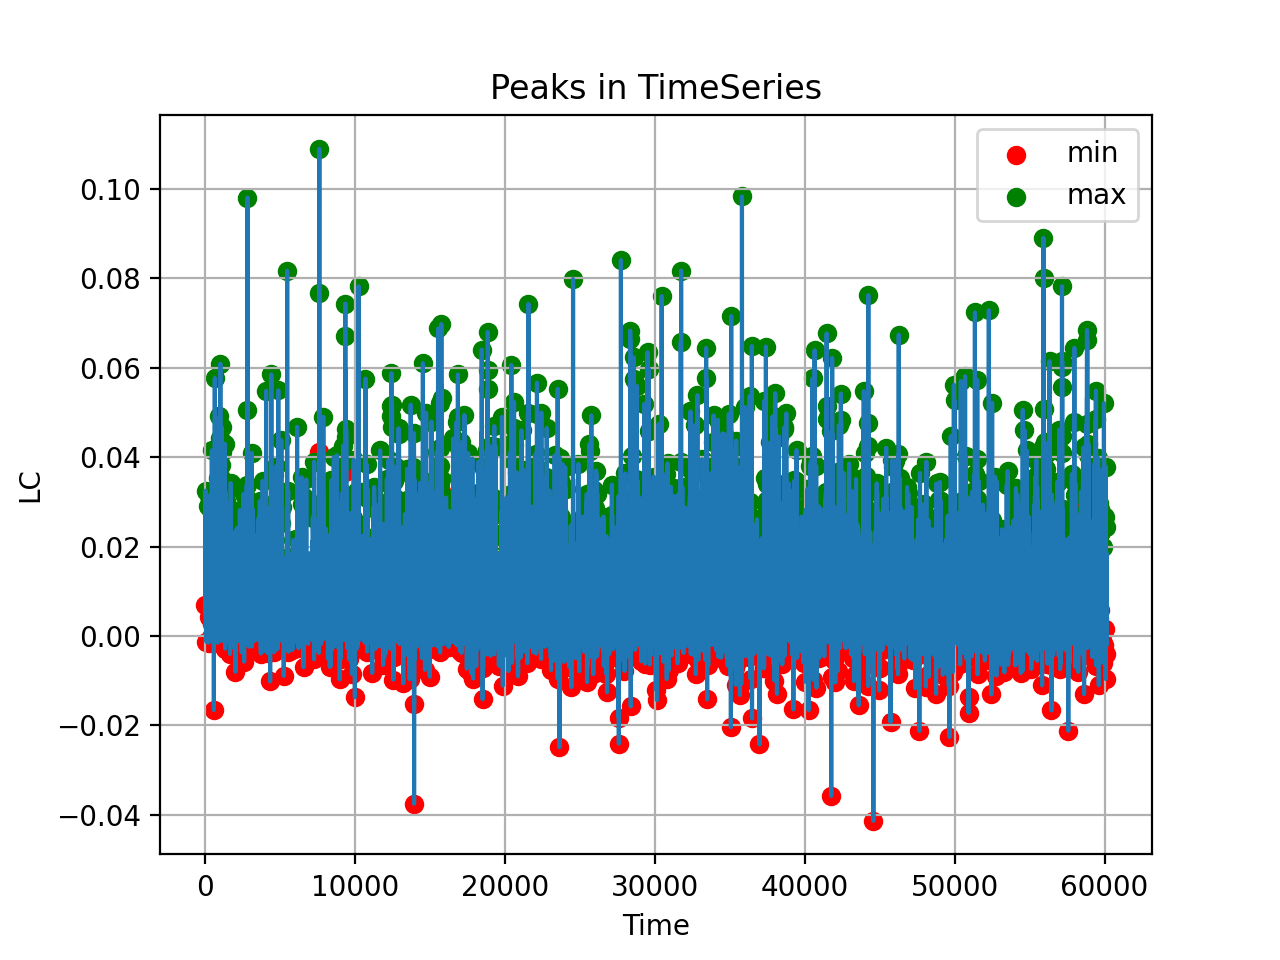

In [53]:
#series = my_timeseries.data['sunspot SWO']
series = vela['RATE']
minpeaks, maxpeaks = findpeaks(series, DELTA=0.02)
# Plotting the figure and extremum points
fig, ax = plt.subplots()
ax.set_ylabel('LC')
ax.set_xlabel('Time')
ax.set_title('Peaks in TimeSeries')
ax.plot(series)
ax.scatter(*zip(*minpeaks), color='red', label='min')
ax.scatter(*zip(*maxpeaks), color='green', label='max')
ax.legend()
ax.grid(True)

#ax.set_xlim(13700,14300)
#ax.set_ylim(-0.02,0.06)

plt.show()

<IPython.core.display.Javascript object>


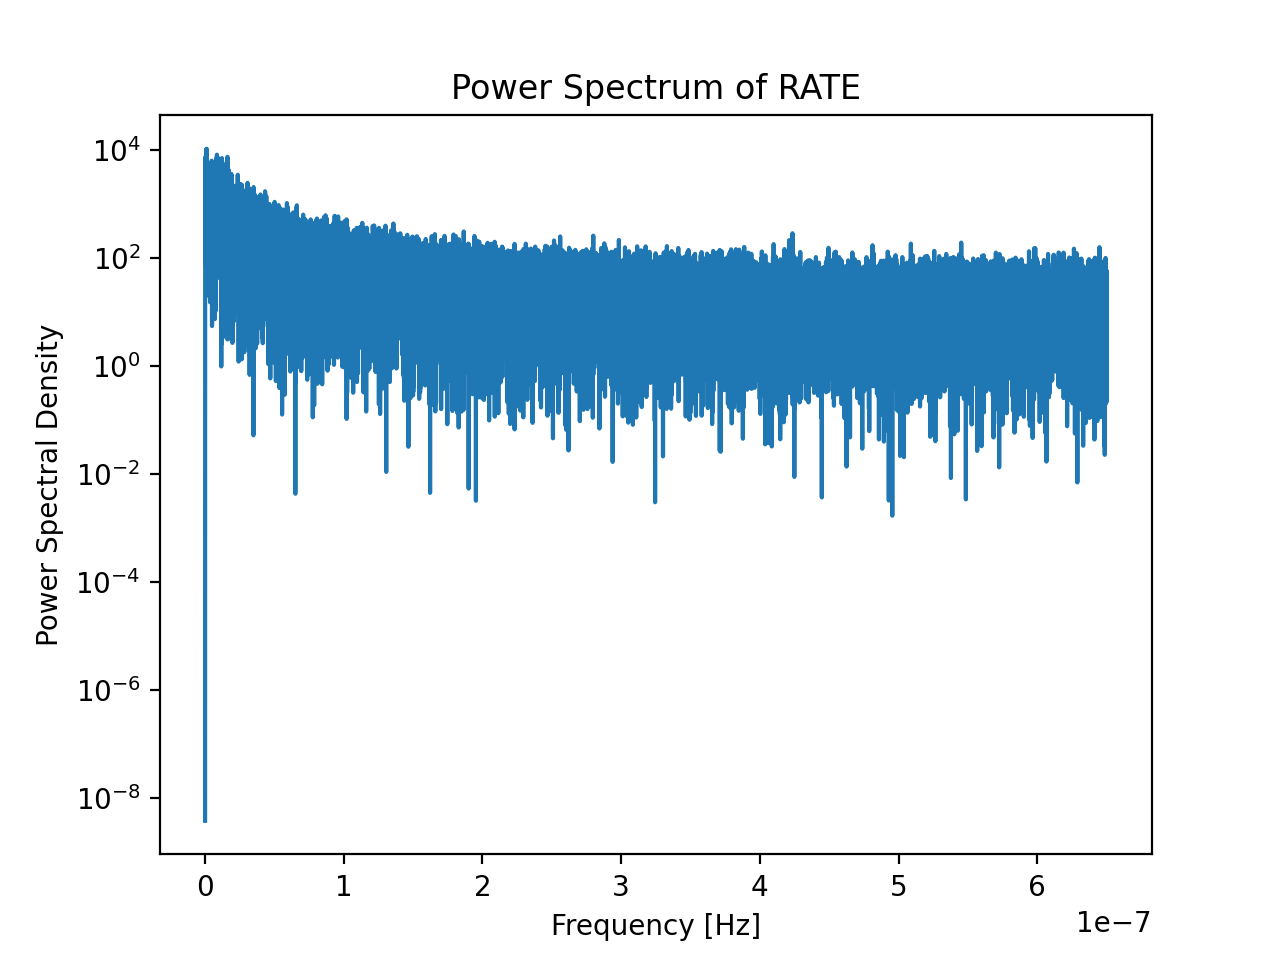

In [93]:
#freq, spectra = signal.periodogram(vela['RATE'], fs=0.25)
freq, spectra = signal.periodogram(vela['RATE'], fs=1/(8.9*86400))

fig, ax = plt.subplots()
plt.semilogy(freq, spectra)
plt.title(f'Power Spectrum of {rate}')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.show()